In [2]:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
! pwd

Mounted at /content/Mdrive
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7


In [ ]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cm
from mpl_toolkits.mplot3d import axes3d
import numpy as np
from scipy import stats
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cio
import cartopy.feature as cfeature
from pandas.core.indexes.interval import date_range
import scipy.stats as stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.manifold import Isomap
from sklearn import datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 3.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669742 sha256=89e5c3bb0547d5639219084539b4b90955034518371eb442ccd78a626ec29835
  Stored in directory: /root/.cache/pip/wheels/a3/07/7c/cc50e8ecc795963726466b22ecd395ee1e2a28da87a4cdeb56
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 4.1 MB/s 
  Installing build dependencies ... done

In [ ]:
def medidas(estacion):
  P = []
  P1 = []
  TMin = []
  TMin1 = []
  TMax = []
  TMax1 = []
  df = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name=str(df['NombreEstacion'][0])
  print('ESTACIÓN : '+name,'\n')
  #P
  df = pd.read_excel(estacion,sheet_name='P')
  df['Procesado'] = (df['Diff']-df['Diff'].mean())/df['Diff'].std()
  P.append(stats.describe(df['Procesado']))
  P1.append(np.median(df['Procesado']))

  #TMin
  df = pd.read_excel(estacion,sheet_name='TMin')
  df['Procesado'] = (df['Diff']-df['Diff'].mean())/df['Diff'].std()
  display(df['Procesado'])
  TMin.append(stats.describe(df['Procesado']))
  TMin1.append(np.median(df['Procesado']))
  #TMax
  df = pd.read_excel(estacion,sheet_name='TMax')
  df['Procesado'] = (df['Diff']-df['Diff'].mean())/df['Diff'].std()
  display(df['Procesado'])
  TMax.append(stats.describe(df['Diff']))
  TMax1.append(np.median(df['Procesado']))
  df1 = {'Estacion':name,'P':[P,P1],'TMin':[TMin,TMin1],'TMax':[TMax,TMax1]}
  df1 = pd.DataFrame(df1)
  display(df1)
  df1.to_excel('123'+name+'.xlsx')
  # #Prints
  print('--------------------------------------------------------------')

In [ ]:
#ANDINAS
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA/
medidas('Botana_1990-2019.xlsx')
medidas('LaJulia_1990-2019.xlsx')
medidas('JardinBotanico_1990-2019.xlsx')
medidas('Tibaitata_1990-2019.xlsx')
medidas('APuertoBerrio_1990-2019.xlsx')
medidas('ElCentro_1990-2019.xlsx')
medidas('UIS_1990-2019.xlsx')
medidas('Caseri_1990-2019.xlsx')
medidas('AguasClaras_1990-2019.xlsx')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA/
medidas('Leticia_1990-2019.xlsx')
medidas('LaChorrera_1990-2019.xlsx')
medidas('PuertoLeguizamo_1990-2019.xlsx')
medidas('Mitu_1990-2019.xlsx')
medidas('Macagual_1990-2019.xlsx')
medidas('SanVicenteDelCaguan_1990-2019.xlsx')
medidas('SanJoseDelGuaviare_1990-2019.xlsx')
medidas('PuertoInirida_1990-2019.xlsx')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA/
medidas('BajoCalima_1990-2019.xlsx')
medidas('Noanama_1990-2019.xlsx')
medidas('SanJosePalmar_1990-2019.xlsx')
medidas('AElCarnaro_1990-2019.xlsx')
medidas('Panamericana_1990-2019.xlsx')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE/
medidas('Turbo_1990-2019.xlsx')
medidas('ElMellito_1990-2019.xlsx')
medidas('Lorica_1990-2019.xlsx')
medidas('LosAlamos_1990-2019.xlsx')
medidas('Guaymaral_1990-2019.xlsx')
medidas('EscuelaNavalCIOH_1990-2019.xlsx')
medidas('LasFlores_1990-2019.xlsx')
medidas('SanLorenzo_1990-2019.xlsx')
medidas('Manaure_1990-2019.xlsx')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA/
medidas('LasGaviotas_1990-2019.xlsx')
medidas('Modulos_1990-2019.xlsx')
medidas('AYopal_1990-2019.xlsx')
medidas('APuertoCarreno_1990-2019.xlsx')
medidas('Tame_1990-2019.xlsx')
medidas('Saravena_1990-2019.xlsx')
medidas('ASantiagoPerez_1990-2019.xlsx')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR/
medidas('Gorgona_1990-2019.xlsx')
medidas('ASesquicentenario_1990-2019.xlsx')
medidas('AElEmbrujo_1990-2019.xlsx')

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA
ESTACIÓN : BOTANA - AUT [52055210] 



0      0.179605
1      0.580167
2      0.818050
3      1.089741
4      0.875122
         ...   
323    1.767038
324   -0.269847
325   -0.332227
326   -0.158725
327   -0.214459
Name: Procesado, Length: 328, dtype: float64

0     -0.004967
1      0.781608
2     -0.369483
3     -1.187394
4     -0.937176
         ...   
316   -1.727768
317   -0.318113
318   -0.544272
319   -0.279694
320    1.230649
Name: Procesado, Length: 321, dtype: float64

,Estacion,P,TMin,TMax
0,BOTANA - AUT [52055210],"[(357, (-3.2864585820068153, 1.859046543033865...","[(328, (-3.3039142488496953, 2.730979233322993...","[(321, (-4.5092456303921296, 1.369886788609779..."
1,BOTANA - AUT [52055210],[0.145489579243632],[-0.004440842076109456],[0.029024830176638348]


--------------------------------------------------------------
ESTACIÓN : JULIA LA [21135050] 



0     -0.716148
1     -1.411302
2     -1.847259
3     -0.215614
4     -0.931192
         ...   
342    0.291160
343    1.309434
344   -0.750505
345   -1.117091
346   -1.150634
Name: Procesado, Length: 347, dtype: float64

0      0.540874
1     -0.149607
2     -1.323070
3      0.326389
4      0.783388
         ...   
340    0.402962
341   -0.241191
342    0.347011
343   -0.592355
344   -1.711544
Name: Procesado, Length: 345, dtype: float64

,Estacion,P,TMin,TMax
0,JULIA LA [21135050],"[(354, (-3.139946722847733, 3.784809361778501)...","[(347, (-2.4666120624121017, 4.362806345163789...","[(345, (-7.708262058810114, -0.657751587225110..."
1,JULIA LA [21135050],[-0.18599916291952406],[-0.01810793628288417],[-0.010118796075713105]


--------------------------------------------------------------
ESTACIÓN : JARDIN BOTANICO  - AUT [21205710] 



0     -0.032254
1     -0.337969
2     -0.239762
3      0.446566
4      0.421570
         ...   
288    1.184080
289    0.162232
290    0.784281
291   -2.006631
292   -0.095527
Name: Procesado, Length: 293, dtype: float64

0     -1.090610
1     -1.726375
2     -0.774735
3      0.022777
4     -0.968437
         ...   
305    0.896545
306   -0.834873
307    0.327269
308   -0.618270
309    0.041989
Name: Procesado, Length: 310, dtype: float64

,Estacion,P,TMin,TMax
0,JARDIN BOTANICO - AUT [21205710],"[(309, (-3.3026354938413296, 3.509915717622174...","[(293, (-4.207151039398455, 3.399313766984725)...","[(310, (-2.2097789874829488, 6.1095070273517),..."
1,JARDIN BOTANICO - AUT [21205710],[0.04926058411208323],[0.017982780479601876],[0.019694154371172883]


--------------------------------------------------------------
ESTACIÓN : TIBAITATA [21205420] 



0     -0.469004
1     -0.348319
2      0.878514
3      0.797904
4     -0.014311
         ...   
343    0.029941
344    0.177517
345   -0.019623
346   -0.540918
347    0.162060
Name: Procesado, Length: 348, dtype: float64

0      0.125322
1      0.579963
2      0.091661
3     -0.798349
4     -0.239353
         ...   
345   -1.960521
346   -1.681446
347    0.148506
348    0.193486
349    0.591912
Name: Procesado, Length: 350, dtype: float64

,Estacion,P,TMin,TMax
0,TIBAITATA [21205420],"[(359, (-2.6835370531936555, 1.895493755178914...","[(348, (-2.771378170167892, 2.842880043825726)...","[(350, (-13.481607135342442, 3.252880420515669..."
1,TIBAITATA [21205420],[-0.1418375484222743],[-0.051270542807071315],[0.20800858034912795]


--------------------------------------------------------------
ESTACIÓN : AEROPUERTO PUERTO BERRIO [23095010] 



0     -0.182853
1      0.398876
2     -1.333719
3     -1.695316
4      0.006057
         ...   
274   -0.050945
275   -0.223704
276   -0.577519
277   -0.728698
278   -1.728263
Name: Procesado, Length: 279, dtype: float64

0     -1.739046
1      0.493772
2     -0.452722
3     -1.570266
4     -0.961660
         ...   
268    3.867834
269   -1.621176
270   -1.314326
271   -1.285844
272   -1.323439
Name: Procesado, Length: 273, dtype: float64

,Estacion,P,TMin,TMax
0,AEROPUERTO PUERTO BERRIO [23095010],"[(283, (-1.7037315768312289, 3.455525296300504...","[(279, (-3.184769249173452, 2.3566278050059988...","[(273, (-4.671016226140395, 5.7409439232905015..."
1,AEROPUERTO PUERTO BERRIO [23095010],[-0.08162368671611378],[0.1536666425451653],[-0.03514935268349669]


--------------------------------------------------------------
ESTACIÓN : CENTRO EL [23155040] 



0     -1.300778
1      0.807402
2      0.041096
3     -0.021734
4     -1.129398
         ...   
222   -0.619365
223   -0.430201
224   -0.403772
225    0.606986
226   -0.293389
Name: Procesado, Length: 227, dtype: float64

0      0.008699
1      1.132552
2     -0.949860
3     -0.229698
4      0.200141
         ...   
222    0.994685
223    0.409651
224    0.085495
225    0.943065
226    0.982073
Name: Procesado, Length: 227, dtype: float64

,Estacion,P,TMin,TMax
0,CENTRO EL [23155040],"[(338, (-3.1745292126938702, 3.165222172865407...","[(227, (-2.340416860155086, 2.8508549867659307...","[(227, (-3.007976350238195, 6.878464613009857)..."
1,CENTRO EL [23155040],[-0.010737625091518967],[0.021851702379265214],[0.058426540508007684]


--------------------------------------------------------------
ESTACIÓN : UNIVERSIDAD INDUSTRIAL SANTANDER [23195040] 



0     -1.464000
1      0.849320
2     -0.566438
3      0.118331
4     -2.830780
         ...   
137    0.844088
138    0.473857
139    1.202547
140    0.210378
141    0.214712
Name: Procesado, Length: 142, dtype: float64

0      1.356439
1      1.542071
2      1.604706
3      1.389037
4      1.139759
         ...   
142   -1.394296
143   -0.470162
144   -0.240005
145   -0.538170
146   -1.059277
Name: Procesado, Length: 147, dtype: float64

,Estacion,P,TMin,TMax
0,UNIVERSIDAD INDUSTRIAL SANTANDER [23195040],"[(146, (-2.578906180184106, 1.8762614150277659...","[(142, (-2.8307804082691588, 3.219919251210712...","[(147, (5.443452611363298, 13.576978949894496)..."
1,UNIVERSIDAD INDUSTRIAL SANTANDER [23195040],[-0.04414680050813731],[0.06831104578493888],[-0.14023627135262734]


--------------------------------------------------------------
ESTACIÓN : CASERI [27045020] 



0     -0.214305
1     -0.372894
2     -0.409752
3     -0.075899
4      0.274513
         ...   
171   -0.174451
172    0.044441
173   -0.072907
174    0.101652
175   -1.262600
Name: Procesado, Length: 176, dtype: float64

0     -1.901957
1     -0.925263
2     -0.999927
3     -0.405136
4     -0.653311
         ...   
172   -0.157263
173    0.078523
174    0.986327
175   -0.775828
176   -2.553385
Name: Procesado, Length: 177, dtype: float64

,Estacion,P,TMin,TMax
0,CASERI [27045020],"[(240, (-2.2974115756029154, 3.026229784593833...","[(176, (-3.3804744466824124, 2.860138196575652...","[(177, (-3.2104516991618084, 6.161936571734358..."
1,CASERI [27045020],[-0.0323159955241694],[0.023005894768622245],[0.10346830969982845]


--------------------------------------------------------------
ESTACIÓN : AGUAS CLARAS [23215030] 



0      0.078275
1      1.311754
2     -0.878415
3      1.553189
4      1.343369
         ...   
232   -0.406543
233   -0.487105
234    1.223422
235    0.499234
236    0.981443
Name: Procesado, Length: 237, dtype: float64

0      2.683066
1      0.698887
2      1.095520
3      1.259951
4     -0.176393
         ...   
253    0.364790
254   -0.353315
255   -0.651314
256   -0.944741
257   -1.529142
Name: Procesado, Length: 258, dtype: float64

,Estacion,P,TMin,TMax
0,AGUAS CLARAS [23215030],"[(333, (-4.305450138746657, 2.0642655472392146...","[(237, (-2.8618853760534835, 2.471144207550849...","[(258, (2.254670349468462, 10.50056698235528),..."
1,AGUAS CLARAS [23215030],[0.008250469744829007],[-0.023361491985316965],[-0.1091775189597585]


--------------------------------------------------------------
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA
ESTACIÓN : AEROPUERTO VASQUEZ COBO [48015050] 



0      0.687316
1     -0.393573
2     -0.139018
3     -0.221918
4     -0.301603
         ...   
322    0.040550
323    0.623846
324    0.083673
325   -0.948883
326   -1.422432
Name: Procesado, Length: 327, dtype: float64

0     -0.194868
1     -0.245892
2      3.710577
3      1.141197
4      0.277576
         ...   
322   -0.205765
323    1.311991
324   -0.179188
325   -0.405462
326    1.729112
Name: Procesado, Length: 327, dtype: float64

,Estacion,P,TMin,TMax
0,AEROPUERTO VASQUEZ COBO [48015050],"[(360, (-3.6418237528702884, 2.640388890408493...","[(327, (-3.6598154870107, 1.9035827754997878),...","[(327, (-0.525082892248701, 5.82612188378619),..."
1,AEROPUERTO VASQUEZ COBO [48015050],[0.002490990764561451],[0.20002595620871477],[-0.1122798660016627]


--------------------------------------------------------------
ESTACIÓN : LA CHORRERA [47075010] 



0     -1.723733
1     -2.315608
2      0.339932
3     -0.812790
4      0.699752
         ...   
213    4.567781
214    2.816705
215    2.294404
216   -0.052457
217    0.703903
Name: Procesado, Length: 218, dtype: float64

0     -0.192239
1      0.685200
2      0.517727
3      1.272692
4      0.302630
         ...   
205   -0.657357
206   -0.702670
207   -0.284429
208   -1.542064
209   -0.792202
Name: Procesado, Length: 210, dtype: float64

,Estacion,P,TMin,TMax
0,LA CHORRERA [47075010],"[(250, (-3.143004155813936, 3.304785020123816)...","[(218, (-5.387636297288078, 4.567781175337819)...","[(210, (-7.987941426874251, 8.03013633011), 1...."
1,LA CHORRERA [47075010],[-0.011466806812602546],[0.05109376130251542],[0.053924913731052015]


--------------------------------------------------------------
ESTACIÓN : PUERTO LEGUIZAMO [47045010] 



0      0.522460
1      1.396240
2      0.405550
3      0.647085
4     -0.303629
         ...   
280   -1.681085
281   -0.886068
282    0.501655
283   -0.458475
284   -1.007726
Name: Procesado, Length: 285, dtype: float64

0     -1.252699
1     -1.959322
2     -1.336537
3     -1.861797
4     -0.909336
         ...   
296    0.263380
297   -0.143250
298   -0.321169
299   -1.196113
300   -0.878281
Name: Procesado, Length: 301, dtype: float64

,Estacion,P,TMin,TMax
0,PUERTO LEGUIZAMO [47045010],"[(338, (-2.767061852099391, 3.47704233048715),...","[(285, (-3.9895730295516496, 3.745318496351133...","[(301, (-2.4659121540507414, 5.096199722968798..."
1,PUERTO LEGUIZAMO [47045010],[-0.02351573364717837],[0.04352285328359976],[-0.03180221706957958]


--------------------------------------------------------------
ESTACIÓN : MITU [42075010] 



0     -0.909889
1      1.051895
2     -0.666307
3     -1.835236
4     -1.930768
         ...   
221    1.003386
222    0.081754
223    0.190626
224    0.648666
225    0.678699
Name: Procesado, Length: 226, dtype: float64

0      0.350312
1      1.113399
2      0.761822
3      1.964635
4      1.361061
         ...   
223    0.436187
224    0.958996
225    0.500301
226    0.734401
227    0.194876
Name: Procesado, Length: 228, dtype: float64

,Estacion,P,TMin,TMax
0,MITU [42075010],"[(252, (-3.583419016852629, 3.982510535016119)...","[(226, (-2.841966766106387, 3.3055657027703997...","[(228, (-5.103205447601329, 5.456582114402167)..."
1,MITU [42075010],[-0.07713188089589917],[0.10323783442485868],[0.02611096720086105]


--------------------------------------------------------------
ESTACIÓN : MACAGUAL [44035030] 



0     -3.129699
1     -2.839968
2     -1.692477
3     -2.964394
4     -2.608462
         ...   
339    0.944958
340   -0.043187
341    0.342842
342    2.192824
343   -0.823957
Name: Procesado, Length: 344, dtype: float64

0     -0.712038
1     -0.779710
2     -1.569464
3     -1.446283
4     -0.310738
         ...   
301    0.388122
302   -0.510476
303   -0.748167
304    0.997683
305    1.890906
Name: Procesado, Length: 306, dtype: float64

,Estacion,P,TMin,TMax
0,MACAGUAL [44035030],"[(344, (-2.476917281844137, 2.7203351980138506...","[(344, (-3.129699392399764, 2.7304214796027755...","[(306, (-1.5893863595262019, 8.959894807589759..."
1,MACAGUAL [44035030],[0.0790789511864588],[0.045436414635008804],[0.023300025691360374]


--------------------------------------------------------------
ESTACIÓN : SAN VICENTE DEL CAGUAN  - AUT [46015030] 



0     -2.268620
1     -1.088852
2     -0.781381
3     -1.877220
4     -2.696871
         ...   
161    1.464623
162    0.962771
163    1.337898
164    0.110719
165   -0.516232
Name: Procesado, Length: 166, dtype: float64

0      1.774953
1      1.501206
2      1.967342
3      1.701539
4      0.445359
         ...   
158    0.444405
159    1.242468
160   -1.349053
161   -1.180908
162   -0.115781
Name: Procesado, Length: 163, dtype: float64

,Estacion,P,TMin,TMax
0,SAN VICENTE DEL CAGUAN - AUT [46015030],"[(243, (-2.4516781752870838, 2.933154193568404...","[(166, (-3.0904992775081106, 2.576496223276636...","[(163, (-4.4888911861736105, 3.872959028633470..."
1,SAN VICENTE DEL CAGUAN - AUT [46015030],[-0.015304135663182903],[0.1173954485863748],[0.0741304075481834]


--------------------------------------------------------------
ESTACIÓN : MAPIRIPANA [32155010] 



0     -0.087087
1     -0.969072
2     -2.220942
3     -1.461443
4     -0.959414
         ...   
249   -0.219179
250   -0.226394
251   -0.514500
252    0.054003
253    0.102241
Name: Procesado, Length: 254, dtype: float64

0      1.084736
1      1.441328
2      0.909533
3      1.991714
4     -2.065243
         ...   
206    0.756138
207    0.440931
208    0.276839
209    0.003727
210   -0.126534
Name: Procesado, Length: 211, dtype: float64

,Estacion,P,TMin,TMax
0,MAPIRIPANA [32155010],"[(299, (-3.6306153866450357, 4.763022365887457...","[(254, (-3.218974872979263, 2.342045579999151)...","[(211, (-0.27826534705083716, 5.92983810249938..."
1,MAPIRIPANA [32155010],[-0.10660389193852716],[0.0808785806925797],[-0.045686403921648265]


--------------------------------------------------------------
ESTACIÓN : PUERTO INIRIDA - AUT [31095030] 



0     -0.593725
1     -1.911688
2     -1.146721
3     -2.825594
4     -2.547939
         ...   
299    0.967645
300    0.387447
301   -0.440460
302   -0.450075
303    0.262758
Name: Procesado, Length: 304, dtype: float64

0     -0.687453
1      0.986899
2     -0.004523
3      0.289191
4      1.221781
         ...   
316    2.034895
317    0.714899
318    0.302110
319    0.553171
320    0.145208
Name: Procesado, Length: 321, dtype: float64

,Estacion,P,TMin,TMax
0,PUERTO INIRIDA - AUT [31095030],"[(333, (-1.9703748083559995, 3.656817841358066...","[(304, (-3.3801099682516145, 2.643777631947843...","[(321, (-0.8967776969237278, 3.602901160901286..."
1,PUERTO INIRIDA - AUT [31095030],[-0.11315387254626005],[0.04655718843646563],[0.06804339109557006]


--------------------------------------------------------------
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
ESTACIÓN : BAJO CALIMA [54075020] 



0      0.744860
1     -0.533997
2      0.070902
3     -0.473256
4     -0.392550
         ...   
303   -1.583657
304   -1.198711
305   -1.939055
306   -0.929059
307   -1.809526
Name: Procesado, Length: 308, dtype: float64

0     -0.144213
1     -0.423370
2     -0.867100
3      0.854037
4     -0.944790
         ...   
307   -0.145527
308    0.236595
309    0.491150
310   -0.724071
311   -1.192185
Name: Procesado, Length: 312, dtype: float64

,Estacion,P,TMin,TMax
0,BAJO CALIMA [54075020],"[(260, (-3.2972954421758014, 2.867076323934484...","[(308, (-3.096857125347255, 1.8366094965304203...","[(312, (-1.1293939619996394, 6.38532350977988)..."
1,BAJO CALIMA [54075020],[0.0274698481918655],[0.14723446338961768],[-0.03771078250846286]


--------------------------------------------------------------
ESTACIÓN : NOANAMA [54085010] 



0      0.673914
1     -0.104427
2      0.280792
3     -0.687991
4      0.155554
         ...   
315   -1.037606
316   -1.831856
317   -1.363668
318    5.106322
319    6.179270
Name: Procesado, Length: 320, dtype: float64

0      0.447002
1      0.812456
2      0.828237
3      0.961707
4      0.245746
         ...   
315   -0.083071
316    0.155663
317    0.835791
318   -0.470998
319    0.010520
Name: Procesado, Length: 320, dtype: float64

,Estacion,P,TMin,TMax
0,NOANAMA [54085010],"[(318, (-3.763062583941717, 2.938636184156093)...","[(320, (-3.542292676124925, 6.17926981697587),...","[(320, (-9.460418196092519, 5.855215162351389)..."
1,NOANAMA [54085010],[0.08493891025223166],[0.07329748995851618],[0.11562305507529551]


--------------------------------------------------------------
ESTACIÓN : SAN JOSE PALMAR [54025010] 



0     -0.613456
1     -1.365656
2     -2.443621
3     -0.107336
4     -0.439943
         ...   
308   -2.606115
309   -2.427580
310   -1.567279
311   -1.960686
312   -1.681627
Name: Procesado, Length: 313, dtype: float64

0     -0.135009
1     -1.396909
2     -0.430980
3      0.295196
4     -0.753321
         ...   
281    0.933974
282    0.745517
283    2.042569
284   -0.384751
285   -0.125936
Name: Procesado, Length: 286, dtype: float64

,Estacion,P,TMin,TMax
0,SAN JOSE PALMAR [54025010],"[(333, (-3.021644124583149, 2.6537835979708), ...","[(313, (-4.902229411523962, 2.4314212975554534...","[(286, (-9.728350671280431, 0.785054510644855)..."
1,SAN JOSE PALMAR [54025010],[0.023645554949896383],[0.08221509104477003],[-0.13047283124813613]


--------------------------------------------------------------
ESTACIÓN : AEROPUERTO EL CARANO [11045010] 



0      0.123487
1     -1.619285
2     -0.276250
3      1.404191
4      0.727942
         ...   
352   -2.460004
353    0.319646
354    0.063162
355   -0.322361
356   -0.250285
Name: Procesado, Length: 357, dtype: float64

0     -1.066521
1     -0.434169
2      0.753959
3      0.768960
4      1.647125
         ...   
351   -0.260652
352    0.496169
353   -0.792878
354   -0.996755
355   -1.022420
Name: Procesado, Length: 356, dtype: float64

,Estacion,P,TMin,TMax
0,AEROPUERTO EL CARANO [11045010],"[(360, (-3.8063274321534406, 2.776118895312065...","[(357, (-2.4805623024754233, 3.832444430147574...","[(356, (-3.6026021114541322, 2.611996764750149..."
1,AEROPUERTO EL CARANO [11045010],[0.048386341367796],[-0.01823959031872386],[-0.0034575518998602394]


--------------------------------------------------------------
ESTACIÓN : PANAMERICANA [56015010] 



0      1.690300
1      0.394301
2      1.182257
3      1.341079
4      0.978763
         ...   
306    0.289274
307    0.308294
308    0.745221
309    0.955372
310    0.651047
Name: Procesado, Length: 311, dtype: float64

0      2.048691
1      0.751515
2     -0.261002
3     -1.320796
4     -1.263194
         ...   
271   -1.397192
272   -0.822462
273   -0.770442
274   -1.831545
275   -2.370143
Name: Procesado, Length: 276, dtype: float64

,Estacion,P,TMin,TMax
0,PANAMERICANA [56015010],"[(348, (-3.0141275672581833, 3.398480494191907...","[(311, (-3.8033956460588034, 1.690299565856208...","[(276, (1.2220041527860808, 7.999993441698667)..."
1,PANAMERICANA [56015010],[0.1251014739627996],[0.24245705192261618],[-0.058685269318568295]


--------------------------------------------------------------
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE
ESTACIÓN : TURBO - AUT [12025040] 



0      0.781047
1      0.970369
2     -0.437608
3     -1.634564
4     -1.267156
         ...   
190    2.009685
191    1.288422
192    1.080733
193    1.023858
194    0.707314
Name: Procesado, Length: 195, dtype: float64

0     -0.093829
1      0.512195
2      0.711373
3      0.059353
4     -0.692552
         ...   
200   -0.330425
201   -0.236888
202    1.098598
203    0.870534
204    0.643436
Name: Procesado, Length: 205, dtype: float64

,Estacion,P,TMin,TMax
0,TURBO - AUT [12025040],"[(226, (-2.5951253405226833, 4.130951750632512...","[(195, (-4.594022335465321, 3.115145421205207)...","[(205, (-1.0917481817367403, 6.020412790895850..."
1,TURBO - AUT [12025040],[-0.10008400815180302],[0.18807117508444465],[0.16292085230425613]


--------------------------------------------------------------
ESTACIÓN : MELLITO EL [12025030] 



0     -0.284909
1     -0.043814
2      0.929201
3      0.088934
4      0.148519
         ...   
318   -5.567174
319   -5.969543
320   -1.536413
321   -1.605803
322    3.883211
Name: Procesado, Length: 323, dtype: float64

0     -0.445826
1      0.032521
2      1.047863
3     -0.290424
4     -0.082937
         ...   
280    4.970326
281   -1.118497
282   -1.033011
283   -1.300314
284   -2.649389
Name: Procesado, Length: 285, dtype: float64

,Estacion,P,TMin,TMax
0,MELLITO EL [12025030],"[(333, (-1.9927796104646691, 9.817503830270038...","[(323, (-5.969543305108002, 3.8832108839526587...","[(285, (-3.735316449286529, 10.472035125522392..."
1,MELLITO EL [12025030],[-0.08552335999611288],[0.17706645974490776],[-0.11345180701468716]


--------------------------------------------------------------
ESTACIÓN : LORICA  ITA - AUT [13085050] 



0      1.197245
1     -0.206471
2      0.361890
3      1.216011
4      0.080567
         ...   
203   -0.901988
204    0.555975
205   -0.082009
206   -0.008786
207    0.346818
Name: Procesado, Length: 208, dtype: float64

0      1.206863
1      0.285820
2     -1.924705
3     -0.109627
4     -1.218696
         ...   
166    0.383231
167   -0.166074
168   -0.072548
169    1.809126
170    0.977048
Name: Procesado, Length: 171, dtype: float64

,Estacion,P,TMin,TMax
0,LORICA ITA - AUT [13085050],"[(241, (-2.519848427081808, 2.7338716217661325...","[(208, (-4.168001897748828, 3.7394116838334854...","[(171, (-5.828893267514097, 8.024957701117671)..."
1,LORICA ITA - AUT [13085050],[0.07209915363661305],[0.08660378842060519],[-0.021702730790264097]


--------------------------------------------------------------
ESTACIÓN : LOS ALAMOS - AUT [25025002] 



0     -0.125896
1     -1.591737
2      0.920380
3     -0.884311
4     -1.538725
         ...   
311    1.366704
312    0.710431
313    1.491966
314    1.174386
315    0.397421
Name: Procesado, Length: 316, dtype: float64

0      2.695611
1     -0.224219
2     -0.757184
3      0.282963
4      1.100665
         ...   
245   -0.888622
246   -1.714881
247   -0.594879
248   -0.267834
249    0.316961
Name: Procesado, Length: 250, dtype: float64

,Estacion,P,TMin,TMax
0,LOS ALAMOS - AUT [25025002],"[(215, (-2.9091989540864014, 3.137969604034858...","[(316, (-3.4364694650393637, 2.116602490418804...","[(250, (-2.2234391652810146, 5.8369576660387),..."
1,LOS ALAMOS - AUT [25025002],[0.091803856666931],[0.15511138532197022],[0.02553781723385906]


--------------------------------------------------------------
ESTACIÓN : GUAYMARAL [28035040] 



0      0.464118
1      0.878321
2     -0.385215
3      0.309258
4     -0.095179
         ...   
341   -1.971055
342   -0.217388
343    0.722229
344   -0.557320
345   -1.127882
Name: Procesado, Length: 346, dtype: float64

0     -0.137734
1      0.565030
2      0.389699
3     -2.059419
4     -0.678961
         ...   
265   -1.294971
266   -0.538555
267    1.126125
268   -0.233564
269    0.346759
Name: Procesado, Length: 270, dtype: float64

,Estacion,P,TMin,TMax
0,GUAYMARAL [28035040],"[(352, (-3.114461513952399, 3.163318963361759)...","[(346, (-3.592167770882981, 3.3759916917063735...","[(270, (-2.708035112677031, 5.015523233076486)..."
1,GUAYMARAL [28035040],[-0.051057323655076106],[0.01347973848489841],[-0.14185042073338205]


--------------------------------------------------------------
ESTACIÓN : ESCUELA NAVAL CIOH [14015030] 



0     -1.065859
1     -1.085412
2     -0.034119
3      0.918447
4     -0.196633
         ...   
162    0.740782
163    0.308535
164    1.037130
165    0.572400
166    0.113212
Name: Procesado, Length: 167, dtype: float64

0      0.806984
1     -0.336848
2      0.173450
3      1.512077
4      0.643423
         ...   
118    0.201335
119    0.292284
120   -0.090907
121   -0.083646
122   -0.614180
Name: Procesado, Length: 123, dtype: float64

,Estacion,P,TMin,TMax
0,ESCUELA NAVAL CIOH [14015030],"[(262, (-3.192630525550889, 3.824673500481076)...","[(167, (-2.7042669518966247, 1.845264802566532...","[(123, (-2.2531165856742135, 5.016096992044979..."
1,ESCUELA NAVAL CIOH [14015030],[0.09946724151299906],[0.22773051567171126],[0.08899039883488903]


--------------------------------------------------------------
ESTACIÓN : FLORES LAS [29045120] 



0      0.391371
1      0.788417
2      0.482910
3      1.591275
4     -1.958312
         ...   
211   -0.442525
212    1.397178
213    0.326088
214   -0.540542
215   -0.117669
Name: Procesado, Length: 216, dtype: float64

0     -1.817925
1     -1.848256
2      0.122302
3      0.709891
4     -0.266603
         ...   
217    0.175376
218    0.541381
219   -1.100014
220   -0.582985
221   -8.761993
Name: Procesado, Length: 222, dtype: float64

,Estacion,P,TMin,TMax
0,FLORES LAS [29045120],"[(278, (-4.550845350974161, 2.8051194210605117...","[(216, (-4.021235205596343, 2.389580247543047)...","[(222, (-8.53750734288343, 6.45990991433337), ..."
1,FLORES LAS [29045120],[0.261942507915341],[0.14840055677986236],[0.03507747484401099]


--------------------------------------------------------------
ESTACIÓN : SAN LORENZO  - AUT [15015060] 



0      3.237058
1      0.561366
2      0.927520
3      1.096009
4      0.835181
         ...   
332   -0.681623
333   -0.198679
334   -0.391803
335   -0.687777
336   -1.552711
Name: Procesado, Length: 337, dtype: float64

0      0.760361
1     -0.225394
2      0.163093
3     -0.237094
4     -2.259570
         ...   
345   -0.372478
346    0.417607
347   -0.677053
348   -1.359768
349   -0.224155
Name: Procesado, Length: 350, dtype: float64

,Estacion,P,TMin,TMax
0,SAN LORENZO - AUT [15015060],"[(351, (-4.378068380914271, 4.009077620254008)...","[(337, (-2.7476002596346656, 3.561300243256193...","[(350, (-8.206770281468398, -1.836096559295519..."
1,SAN LORENZO - AUT [15015060],[0.06808993163361472],[0.003352404157337677],[-0.00969674064258515]


--------------------------------------------------------------
ESTACIÓN : MANAURE [15075030] 



0      0.248342
1      0.209160
2      0.084756
3     -1.170487
4     -2.460087
         ...   
260    1.080910
261    0.638115
262    0.273726
263   -0.319493
264    0.822865
Name: Procesado, Length: 265, dtype: float64

0     -0.587960
1     -1.947378
2     -2.151858
3     -1.732493
4     -0.732907
         ...   
309    1.150058
310    0.947409
311    1.340703
312    1.460459
313    1.524749
Name: Procesado, Length: 314, dtype: float64

,Estacion,P,TMin,TMax
0,MANAURE [15075030],"[(307, (-4.172872754658135, 3.4784351020895987...","[(265, (-3.891490058505534, 2.3729497539322684...","[(314, (-2.5847743738722357, 6.215518040529162..."
1,MANAURE [15075030],[0.3752778001773428],[0.19118990556210455],[0.046932186205242185]


--------------------------------------------------------------
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA
ESTACIÓN : LAS GAVIOTAS [34015010] 



0      1.237986
1      1.005671
2      0.238602
3      0.708583
4      0.699011
         ...   
337    0.543470
338   -1.177345
339    0.851220
340    1.321116
341   -0.515797
Name: Procesado, Length: 342, dtype: float64

0      1.454812
1      0.301293
2      0.723823
3      1.016851
4      0.525713
         ...   
339   -1.059954
340   -1.235540
341   -0.297227
342   -0.187627
343   -0.650180
Name: Procesado, Length: 344, dtype: float64

,Estacion,P,TMin,TMax
0,LAS GAVIOTAS [34015010],"[(358, (-3.070705780903992, 3.618522783120583)...","[(342, (-3.894296255446005, 2.3912193446751577...","[(344, (-0.7591412996065223, 7.789587334726562..."
1,LAS GAVIOTAS [34015010],[-0.2038445262330831],[0.23901338792563467],[0.03102943998485563]


--------------------------------------------------------------
ESTACIÓN : MODULOS - AUT [35225030] 



0     -2.975690
1     -0.675652
2     -0.082479
3      0.092666
4     -0.829739
         ...   
318    1.329902
319    0.103409
320    1.533575
321    1.761386
322    0.204819
Name: Procesado, Length: 323, dtype: float64

0     -0.707538
1     -0.108363
2      0.236965
3      0.205723
4      1.679255
         ...   
325   -0.704634
326   -0.586501
327   -0.684268
328    0.471414
329   -0.927933
Name: Procesado, Length: 330, dtype: float64

,Estacion,P,TMin,TMax
0,MODULOS - AUT [35225030],"[(337, (-3.801345132515685, 4.16478178344982),...","[(323, (-3.246223253707504, 3.0942752079059463...","[(330, (-2.0463059209553975, 5.054481219743295..."
1,MODULOS - AUT [35225030],[-0.07971618351396222],[0.08891422937786712],[0.05196815351399828]


--------------------------------------------------------------
ESTACIÓN : AEROPUERTO YOPAL - AUT [35215020] 



0     -0.581714
1      0.473891
2      0.538330
3      1.475377
4      0.652684
         ...   
256   -0.101880
257    0.629823
258    1.387021
259    0.936394
260    1.295524
Name: Procesado, Length: 261, dtype: float64

0      0.506728
1      1.274316
2      2.890833
3      3.325087
4     -0.023122
         ...   
267   -0.883371
268   -1.409398
269   -0.368576
270   -1.017754
271   -1.398793
Name: Procesado, Length: 272, dtype: float64

,Estacion,P,TMin,TMax
0,AEROPUERTO YOPAL - AUT [35215020],"[(355, (-2.2503250084961954, 3.387096449846451...","[(261, (-2.862486872725327, 3.722144572416338)...","[(272, (0.4022817911157546, 6.926758354927056)..."
1,AEROPUERTO YOPAL - AUT [35215020],[-0.2032344776628477],[-0.018318195135197994],[-0.0008111899737924689]


--------------------------------------------------------------
ESTACIÓN : AEROPUERTO PUERTO CARRENO [38015030] 



0     -2.069073
1      0.627613
2      0.648871
3     -1.393104
4      0.454860
         ...   
339    1.397268
340    0.303528
341    0.253045
342    1.093108
343    1.800660
Name: Procesado, Length: 344, dtype: float64

0     -0.002985
1      0.030900
2      0.027348
3     -0.159962
4     -0.233820
         ...   
339   -0.482287
340    0.148444
341   -0.700034
342    1.063887
343   -1.736636
Name: Procesado, Length: 344, dtype: float64

,Estacion,P,TMin,TMax
0,AEROPUERTO PUERTO CARRENO [38015030],"[(360, (-2.3233657687575215, 4.53569819496085)...","[(344, (-3.303164736360397, 2.8319425034831727...","[(344, (-0.7214389549266116, 7.576457389847992..."
1,AEROPUERTO PUERTO CARRENO [38015030],[-0.0635099982733647],[0.08025276486317204],[-0.02415615882752032]


--------------------------------------------------------------
ESTACIÓN : TAME [36025010] 



0     -0.138348
1     -0.641525
2      0.512999
3     -1.456304
4     -0.150023
         ...   
248   -0.728549
249   -0.385889
250   -0.292834
251   -0.377325
252   -0.394096
Name: Procesado, Length: 253, dtype: float64

0      2.364121
1      1.609022
2      0.186151
3      0.577468
4     -0.168736
         ...   
186    0.988524
187    0.602461
188    0.389454
189    0.920401
190    0.181232
Name: Procesado, Length: 191, dtype: float64

,Estacion,P,TMin,TMax
0,TAME [36025010],"[(325, (-3.2591697680720535, 4.757828830114335...","[(253, (-3.7711546764428054, 2.275259969721741...","[(191, (-2.5033636545114177, 8.01447245418095)..."
1,TAME [36025010],[-0.12562362448878062],[0.06372215606665317],[0.056236112317851736]


--------------------------------------------------------------
ESTACIÓN : SARAVENA  - AUT [37045010] 



0      0.012654
1      0.393648
2     -1.471068
3     -0.837462
4      0.328142
         ...   
164    0.529888
165    0.014010
166   -0.566311
167    0.125752
168    0.814067
Name: Procesado, Length: 169, dtype: float64

0      1.759479
1     -0.104104
2      0.151165
3     -0.107925
4      0.060132
         ...   
223    0.742039
224    1.329848
225    2.271047
226    0.279135
227    0.394827
Name: Procesado, Length: 228, dtype: float64

,Estacion,P,TMin,TMax
0,SARAVENA - AUT [37045010],"[(252, (-3.402608679793959, 2.1039358864928506...","[(169, (-2.7112866043286576, 3.755164254948182...","[(228, (-1.4152613190230525, 8.772437130315087..."
1,SARAVENA - AUT [37045010],[0.2767585092819249],[-0.021569244536663396],[0.07033309268518324]


--------------------------------------------------------------
ESTACIÓN : AEROPUERTO SANTIAGO PÉREZ [37055010] 



0     -0.801552
1     -1.063550
2     -0.021521
3      0.190174
4      1.499733
         ...   
340    1.663497
341    0.725882
342    0.998570
343    0.773714
344    0.003020
Name: Procesado, Length: 345, dtype: float64

0      0.019966
1     -0.034604
2      0.590290
3     -0.525696
4      1.309617
         ...   
340    0.747399
341    0.532871
342    0.265542
343    1.383416
344    1.453857
Name: Procesado, Length: 345, dtype: float64

,Estacion,P,TMin,TMax
0,AEROPUERTO SANTIAGO PÉREZ [37055010],"[(360, (-3.8111752006745485, 3.526564115075782...","[(345, (-3.258237290578749, 2.013258735289869)...","[(345, (-1.7221202157930051, 6.744903238754659..."
1,AEROPUERTO SANTIAGO PÉREZ [37055010],[0.1741183866333043],[0.1260755979520129],[-0.09391622428165537]


--------------------------------------------------------------
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR
ESTACIÓN : GORGONA GUAPI [57025020] 



0      1.251659
1      1.215138
2      1.246147
3     -0.139211
4      0.801167
         ...   
246    0.866214
247    0.973341
248    0.781536
249   -1.446248
250    1.046812
Name: Procesado, Length: 251, dtype: float64

0     -1.612391
1     -0.893821
2     -0.455444
3     -0.326835
4     -0.884602
         ...   
293    0.377394
294    0.453029
295    0.083374
296   -0.535172
297    0.911062
Name: Procesado, Length: 298, dtype: float64

,Estacion,P,TMin,TMax
0,GORGONA GUAPI [57025020],"[(344, (-3.647361675799476, 2.686635754397684)...","[(251, (-4.0945378780845045, 2.662614744929032...","[(298, (-0.2341351652626109, 8.405344099060759..."
1,GORGONA GUAPI [57025020],[-0.005034728687120462],[0.1413331516040061],[-0.11366411805378746]


--------------------------------------------------------------
ESTACIÓN : AEROPUERTO SESQUICENTENARIO [17015010] 



0      1.166828
1      0.191880
2      0.085452
3      1.480493
4      1.186050
         ...   
327   -1.608793
328   -2.629935
329   -1.534416
330    0.022249
331   -1.475599
Name: Procesado, Length: 332, dtype: float64

0     -1.317065
1      0.489935
2      0.882546
3     -0.329583
4     -0.506369
         ...   
325    0.982456
326    0.997053
327    0.699222
328    0.214895
329    1.703124
Name: Procesado, Length: 330, dtype: float64

,Estacion,P,TMin,TMax
0,AEROPUERTO SESQUICENTENARIO [17015010],"[(347, (-3.0824130022973755, 4.260860908618205...","[(332, (-3.458273445202776, 2.471257999355471)...","[(330, (1.3831131186112522, 5.208148533587082)..."
1,AEROPUERTO SESQUICENTENARIO [17015010],[-0.005130647420231081],[-0.04302866187626887],[-0.10986619161957412]


--------------------------------------------------------------
ESTACIÓN : AEROPUERTO EL EMBRUJO [17025020] 



0     -0.052528
1      0.292671
2     -1.882194
3     -0.940041
4      2.479111
         ...   
315    0.209233
316   -0.365291
317    1.023790
318   -0.005115
319   -0.374174
Name: Procesado, Length: 320, dtype: float64

0      0.031966
1     -0.236773
2     -0.895331
3      1.115733
4      0.072929
         ...   
307   -0.004851
308    0.104741
309   -0.418502
310   -0.646461
311    0.855943
Name: Procesado, Length: 312, dtype: float64

,Estacion,P,TMin,TMax
0,AEROPUERTO EL EMBRUJO [17025020],"[(360, (-4.285386205940502, 3.9516358117418693...","[(320, (-2.9030626688813674, 2.89734315601956)...","[(312, (2.103623698383579, 4.93694402042075), ..."
1,AEROPUERTO EL EMBRUJO [17025020],[-0.05433326975198652],[0.08103093907675728],[-0.06443157369391818]


--------------------------------------------------------------


In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
! pwd

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7


In [ ]:
df = pd.read_excel('Libro_estaciones.xlsx')
df.sort_values(by=['diff_altitud'],ascending=True,inplace=True)
display(df)

,Codigo,Estacion,Departamento,Municipio,Identificador,lat,lat_E,dif_lat,lon,lon_E,dif_lon,diferencia,altitud_i,altitud_e,diff_altitud,epromedio_p,epromedio_tmin,epromedio_tmax
6,23195040,UIS [23195040],Santander,Bucaramanga,0,7.144722,7.25,0.105278,-73.122222,-73.00,0.122222,0.227500,898,2118,-1220,-624.508526,6.952348,8.457359
13,44035030,MACAGUAL [44035030],Caquetá,Florencia,1,1.500000,1.50,0.000000,-75.660000,-75.75,0.090000,0.090000,238,660,-422,126.505916,1.967866,2.922983
0,52055210,BOTANA - AUT [52055210],Nariño,Pasto,0,1.160000,1.25,0.090000,-77.278806,-77.25,0.028806,0.118806,2790,3204,-414,-100.634663,-2.008543,-1.018043
8,23215030,AGUAS CLARAS [23215030],Cesar,Aguachica,0,8.228889,8.25,0.021111,-73.602778,-73.50,0.102778,0.123889,134,332,-198,-121.067484,2.128336,5.386448
33,35215020,AEROPUERTO YOPAL - AUT [35215020],Casanare,Yopal,4,5.320444,5.25,0.070444,-72.387500,-72.50,0.112500,0.182944,314,462,-148,79.983831,1.123070,2.637943
2,21205710,JARDIN BOTANICO - AUT [21205710],Cundinamarca,Bogota,0,4.669333,4.75,0.080667,-74.102667,-74.00,0.102667,0.183333,2553,2701,-148,0.512984,-1.394809,1.704091
18,54085010,NOANAMA [54085010],Chocó,Medio_San_Juan,2,4.688190,4.75,0.061810,-76.934250,-77.00,0.065750,0.127560,21,115,-94,-106.945340,-0.247627,-0.111269
4,23095010,AEROPUERTO PUERTO BERRIO [23095010],Antioquia,Puerto_Berrio,0,6.465000,6.50,0.035000,-74.412222,-74.50,0.087778,0.122778,110,201,-91,129.586133,-0.465501,-0.553324
5,23155040,CENTRO EL [23155040],Santander,Barrancabermeja,0,6.859556,6.75,0.109556,-73.765083,-73.75,0.015083,0.124639,104,150,-46,-33.820917,0.202781,2.862421
10,47075010,LA CHORRERA [47075010],Amazonas,La_Chorrera,1,-1.444611,-1.50,0.055389,-72.789583,-72.75,0.039583,0.094972,110,156,-46,13.374350,-0.792322,1.625482


##**PENDIENDES**
1. Obtener la mediana - promedio de los errores para cada estación en cada variable y graficarlos, ver si en función de la estación con respecto a la diferencia de altura y a la altura IDEAM.
✅

2. Hacer un plot con respecto a la diferencia de altitudes de Correlación Pearson✅

3. Doble Diferencia: hacer un delta de Temperatura Máxima y Mínima dentro de cada set (Dentro del propio IDEAM y el ERA5) y graficarlo en función del tiempo y de la diferencia de altura y a la altura IDEAM.✅

4. Gauss ✅


5. Hacer el scatter plot con respecto a $e^{ΔT/2}$

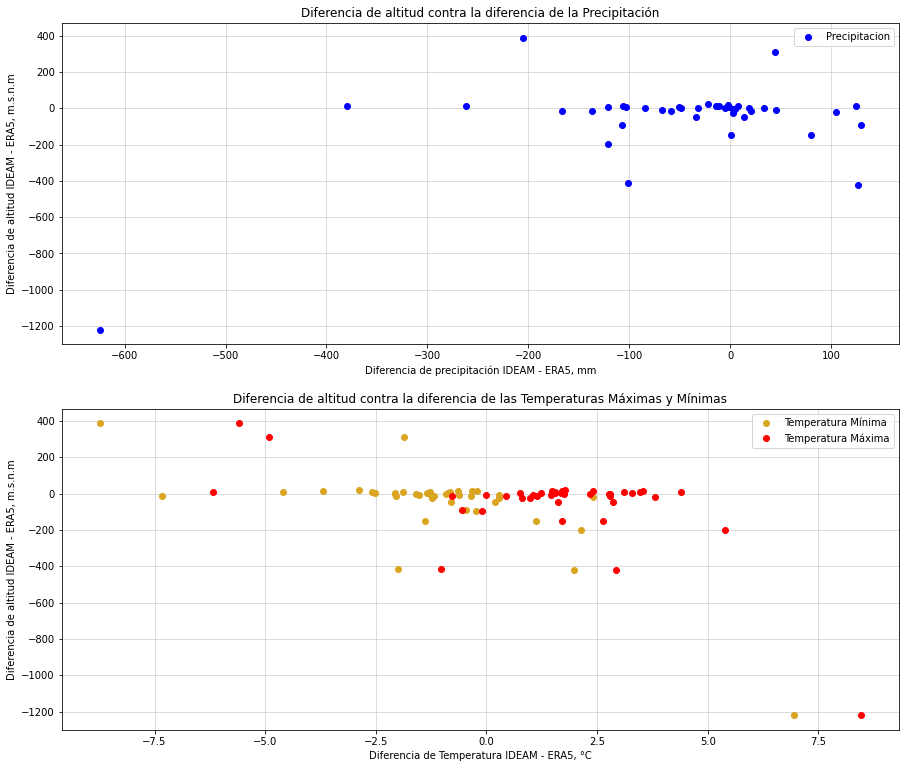

In [ ]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(15,13))
ax.plot(df['epromedio_p'],df['diff_altitud'],marker='o',color='blue',linestyle='',label='Precipitacion')
ax.grid(axis='both',color='lightgray')
ax.set_ylabel('Diferencia de altitud IDEAM - ERA5, m.s.n.m')
ax.set_xlabel('Diferencia de precipitación IDEAM - ERA5, mm')
ax.set_title('Diferencia de altitud contra la diferencia de la Precipitación')
ax.legend()
ax.plot()
ax1.plot(df['epromedio_tmin'],df['diff_altitud'],marker='o',color='goldenrod',linestyle='',label='Temperatura Mínima')
ax1.plot(df['epromedio_tmax'],df['diff_altitud'],marker='o',color='red',linestyle='',label='Temperatura Máxima')
ax1.set_xlabel('Diferencia de Temperatura IDEAM - ERA5, °C')
ax1.set_ylabel('Diferencia de altitud IDEAM - ERA5, m.s.n.m')
ax1.grid(axis='both',color='lightgray')
ax1.set_title('Diferencia de altitud contra la diferencia de las Temperaturas Máximas y Mínimas')
ax1.legend()
ax1.plot()
plt.savefig('UNIRPDFS.pdf',dpi=300)

In [ ]:
df = pd.read_excel('Libro_estaciones.xlsx')
df.sort_values(by=['altitud_i'],ascending=True,inplace=True)
display(df)

,Codigo,Estacion,Departamento,Municipio,Identificador,lat,lat_E,dif_lat,lon,lon_E,dif_lon,diferencia,altitud_i,altitud_e,diff_altitud,epromedio_p,epromedio_tmin,epromedio_tmax
30,15075030,MANAURE [15075030],La_Guajira,Manaure,3,11.781056,11.75,0.031056,-72.463500,-72.50,0.036500,0.067556,0,1,-1,-31.368331,-1.271607,2.782039
40,17025020,AEROPUERTO EL EMBRUJO [17025020],San_Andrés_y_Providencia,Providencia,5,13.359500,13.25,0.109500,-81.357722,-81.25,0.107722,0.217222,2,0,2,-5.113454,-2.075783,3.281329
28,29045120,FLORES LAS [29045120],Atlántico,Barranquilla,3,11.040000,11.00,0.040000,-74.820833,-74.75,0.070833,0.110833,5,6,-1,-48.264421,-0.919965,2.759240
27,14015030,ESCUELA NAVAL CIOH [14015030],Bolívar,Cartagena_De_Indias,3,10.447222,10.50,0.052778,-75.516111,-75.50,0.016111,0.068889,6,20,-14,-58.096208,-2.047657,1.148569
38,57025020,GORGONA GUAPI [57025020],Cauca,Guapi,5,2.962944,3.00,0.037056,-78.174361,-78.25,0.075639,0.112694,7,0,7,-120.955923,-2.593748,4.388613
22,12025040,TURBO - AUT [12025040],Antioquia,Turbo,3,8.091806,8.00,0.091806,-76.716333,-76.75,0.033667,0.125472,10,0,10,-10.703242,-1.893227,3.479216
39,17015010,AEROPUERTO SESQUICENTENARIO [17015010],San_Andrés_y_Providencia,San_Andrés,5,12.542183,12.50,0.042183,-81.730969,-81.75,0.019031,0.061214,10,0,10,-13.737811,-1.274146,3.109718
21,56015010,PANAMERICANA [56015010],Chocó,Bahia_Solano,2,6.223333,6.25,0.026667,-77.404444,-77.50,0.095556,0.122222,12,0,12,-106.161032,-3.685084,3.527885
18,54085010,NOANAMA [54085010],Chocó,Medio_San_Juan,2,4.688190,4.75,0.061810,-76.934250,-77.00,0.065750,0.127560,21,115,-94,-106.945340,-0.247627,-0.111269
24,13085050,LORICA ITA - AUT [13085050],Córdoba,Lorica,3,9.252722,9.25,0.002722,-75.844417,-75.75,0.094417,0.097139,24,24,0,-83.806094,-2.075962,2.336490


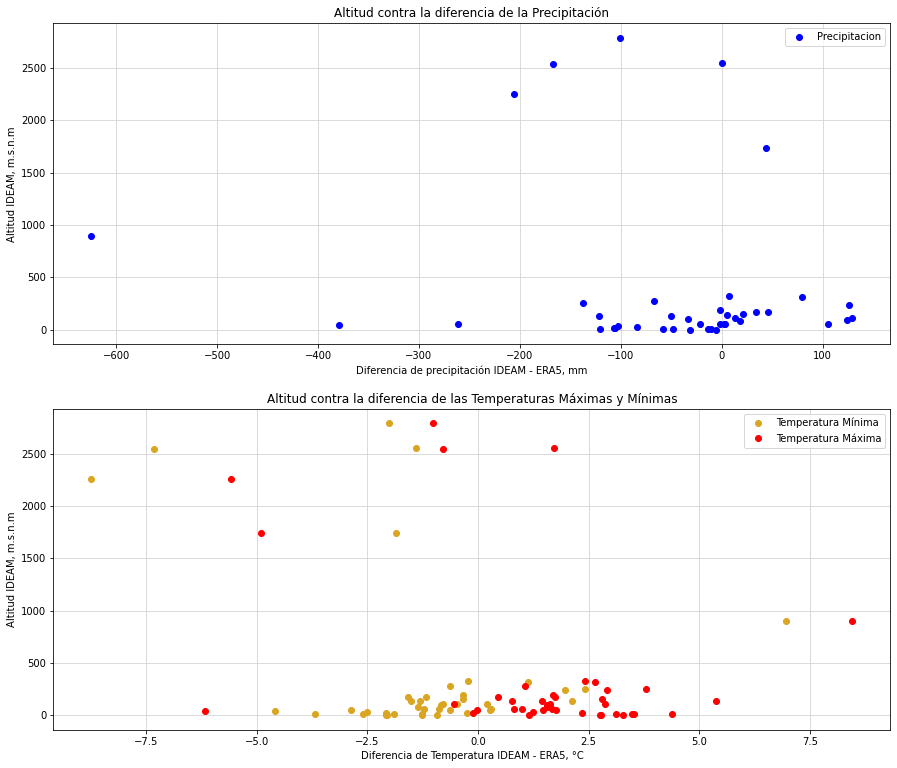

In [ ]:
fig,(ax,ax1) = plt.subplots(nrows=2,ncols=1,figsize=(15,13))
ax.plot(df['epromedio_p'],df['altitud_i'],marker='o',color='blue',linestyle='',label='Precipitacion')
ax.grid(axis='both',color='lightgray')
ax.set_ylabel('Altitud IDEAM, m.s.n.m')
ax.set_xlabel('Diferencia de precipitación IDEAM - ERA5, mm')
ax.set_title('Altitud contra la diferencia de la Precipitación')
ax.legend()
ax.plot()
ax1.plot(df['epromedio_tmin'],df['altitud_i'],marker='o',color='goldenrod',linestyle='',label='Temperatura Mínima')
ax1.plot(df['epromedio_tmax'],df['altitud_i'],marker='o',color='red',linestyle='',label='Temperatura Máxima')
ax1.set_xlabel('Diferencia de Temperatura IDEAM - ERA5, °C')
ax1.set_ylabel('Altitud IDEAM, m.s.n.m')
ax1.grid(axis='both',color='lightgray')
ax1.set_title('Altitud contra la diferencia de las Temperaturas Máximas y Mínimas')
ax1.legend()
ax1.plot()
plt.savefig('UNIRPDFS2.pdf',dpi=300)

1. Calidad de Datos
2. Diff en lat lon alt
3. Con el número de observaciones hacer la fig para ver la relación


#**CORRER CORRER CORRER**

In [ ]:
def ggaus(estaciones):
  #Precipitación
  df = pd.read_excel(estaciones,sheet_name='P')
  fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
  ax1.hist(df['skewness'],bins=20,edgecolor='royalblue',color='whitesmoke')
  ax1.set_xlabel('Skewness')
  ax1.set_ylabel('Frecuencia en número de estaciones')
  ax1.set_title('Distribución de la oblicuidad de la diferencia de precipitación')
  #2
  ax2.hist(df['kurtosis'],bins=20,edgecolor='royalblue',color='whitesmoke')
  ax2.set_xlabel('Kurtosis')
  ax2.set_ylabel('Frecuencia en número de estaciones')
  ax2.set_title('Distribución de la curtosis de la diferencia de precipitación')
  plt.savefig('NormalizedP.pdf',dpi=300)

  #TMin
  df = pd.read_excel(estaciones,sheet_name='TMin')
  fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
  ax1.hist(df['skewness'],bins=20,edgecolor='goldenrod',color='whitesmoke')
  ax1.set_xlabel('Skewness')
  ax1.set_ylabel('Frecuencia en número de estaciones')
  ax1.set_title('Distribución de la oblicuidad de la diferencia de la temperatura mínima')
  #2
  ax2.hist(df['kurtosis'],bins=20,edgecolor='goldenrod',color='whitesmoke')
  ax2.set_xlabel('Kurtosis')
  ax2.set_ylabel('Frecuencia en número de estaciones')
  ax2.set_title('Distribución de la curtosis de la diferencia de la temperatura mínima')
  plt.savefig('NormalizedTMIN.pdf',dpi=300)

  #TMax

  df = pd.read_excel(estaciones,sheet_name='TMax')
  fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
  ax1.hist(df['skewness'],bins=20,edgecolor='red',color='whitesmoke')
  ax1.set_xlabel('Skewness')
  ax1.set_ylabel('Frecuencia en número de estaciones')
  ax1.set_title('Distribución de la oblicuidad de la diferencia de la temperatura máxima')
  #2
  ax2.hist(df['kurtosis'],bins=20,edgecolor='red',color='whitesmoke')
  ax2.set_xlabel('Kurtosis')
  ax2.set_ylabel('Frecuencia en número de estaciones')
  ax2.set_title('Distribución de la curtosis de la diferencia de la temperatura máxima')
  plt.savefig('NormalizedTMAX.pdf',dpi=300)

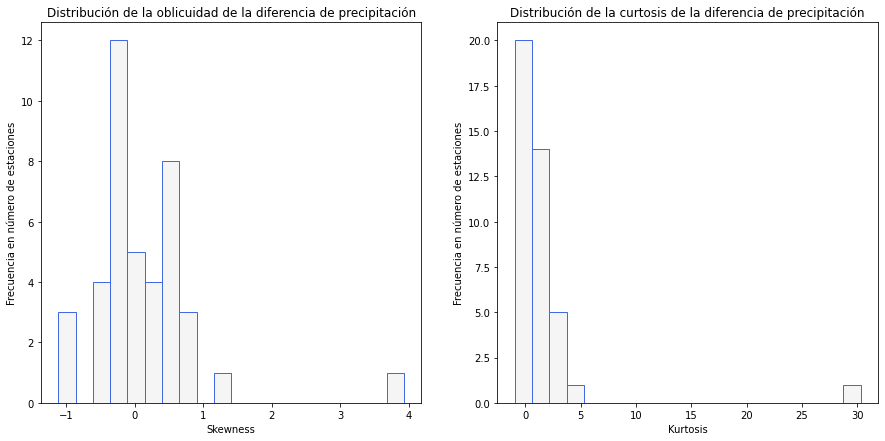

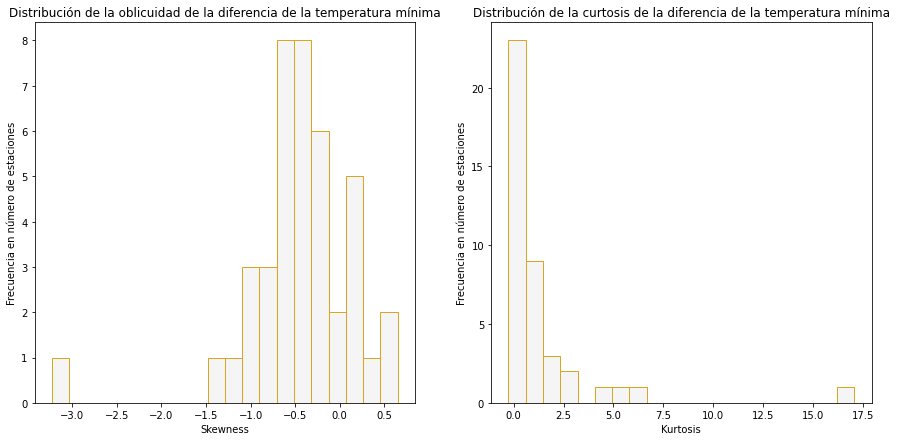

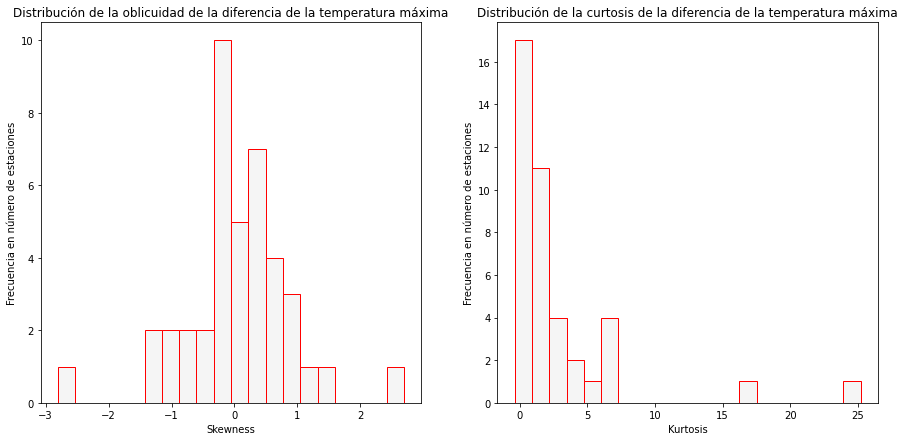

In [ ]:
ggaus('Libro_estaciones.xlsx')

In [ ]:
from datetime import datetime

,ERA5,Fera,Fecha
0,11.028577,1990-01-01,1990-01-01
1,13.795956,1990-02-01,1990-02-01
2,11.097276,1990-03-01,1990-03-01
3,11.798142,1990-04-01,1990-04-01
4,10.200028,1990-05-01,1990-05-01
...,...,...,...
355,12.553755,2019-08-01,2019-08-01
356,10.841722,2019-09-01,2019-09-01
357,9.632450,2019-10-01,2019-10-01
358,10.610854,2019-11-01,2019-11-01


,IDEAM,Fecha
0,17.2,1990-01-01
1,16.6,1990-02-01
2,16.4,1990-03-01
3,15.0,1990-04-01
4,12.0,1990-05-01
...,...,...
232,14.0,2009-05-01
233,14.7,2009-06-01
234,13.2,2009-07-01
235,14.6,2009-08-01


,IDEAM,Fecha,ERA5,Fera
0,17.2,1990-01-01,11.028577,1990-01-01
1,16.6,1990-02-01,13.795956,1990-02-01
2,16.4,1990-03-01,11.097276,1990-03-01
3,15.0,1990-04-01,11.798142,1990-04-01
4,12.0,1990-05-01,10.200028,1990-05-01
...,...,...,...,...
232,14.0,2009-05-01,10.510392,2009-05-01
233,14.7,2009-06-01,11.001681,2009-06-01
234,13.2,2009-07-01,10.159769,2009-07-01
235,14.6,2009-08-01,10.132052,2009-08-01


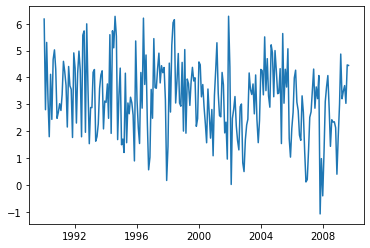

In [ ]:
df = pd.read_excel('AguasClaras_1990-2019.xlsx',sheet_name='DERA')
df['Fera'] = pd.to_datetime(df['Fera'],'%Y-%m')
df['Fecha'] = df['Fera']
ERA5 = df['ERA5']
display(df)
df1 = pd.read_excel('AguasClaras_1990-2019.xlsx',sheet_name='DIDEAM')
df1['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m')
df1['Fecha'] = df1['Fecha']
IDEAM = df1['IDEAM']
display(df1)
dff = pd.merge(df1,df,how='left',left_on=['Fecha'],right_on=['Fecha'])
#merge=pd.merge(df,d, how='inner', left_index=True, right_index=True)
display(dff)
dff['Diff'] = (dff['IDEAM']-dff['ERA5'])
plt.plot(dff['Fecha'],dff['Diff'])

In [ ]:
def dobled(estacion):
  df = pd.read_excel(estacion,sheet_name='DERA')
  df['Fera'] = pd.to_datetime(df['Fera'],'%Y-%m')
  df['Fecha'] = df['Fera']
  ERA5 = df['ERA5']
  df1 = pd.read_excel(estacion,sheet_name='DIDEAM')
  df1['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m')
  df1['Fecha'] = df1['Fecha']
  IDEAM = df1['IDEAM']
  dff = pd.merge(df1,df,how='left',left_on=['Fecha'],right_on=['Fecha'])
  dff['Diff'] = (dff['IDEAM']-dff['ERA5'])
  return dff['Diff'],dff['Fecha']

In [ ]:
def dobledif(estacion):
  df = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name = str(df['NombreEstacion'][0])
  fig,(ax0,ax1,ax2,ax3,ax4) = plt.subplots(nrows=1,ncols=5,figsize=(40,7))
  df = pd.read_excel('Libro_estaciones.xlsx')
  df.loc[df['Estacion']==name]
  alturai = df['altitud_i']
  df = pd.read_excel(estacion,sheet_name='DERA')
  maxe = df['ERA5'].max()
  mine = df['ERA5'].min()
  era5 = df['ERA5']
  fera = df['Fera']
  ax0.plot(fera,era5,marker='o',color='green',linestyle='solid',label='Doble diferencia, Temperaturas ERA5')
  df = pd.read_excel(estacion,sheet_name='DIDEAM')
  ideam = df['IDEAM']
  fecha = df['Fecha']
  maxi = df['IDEAM'].max()
  mini = df['IDEAM'].min()
  ax0.plot(fecha,ideam,marker='o',color='orange',linestyle='solid',label='Doble diferencia, Temperaturas IDEAM')
  ax0.set_title('Delta de temperaturas para cada $dataset$, Estación '+name)
  ax0.set_ylabel('Diferencia en °C')
  ax0.set_xlabel('Año')
  ax0.legend()
  min = []
  max = []
  if mini < mine:
    min.append(mini)
  elif mini > mine:
    min.append(mine)
  elif mini == mine:
    min.append(mine)
  #Parte 2:
  if maxi > maxe:
    max.append(maxi)
  elif maxi <maxe:
    max.append(maxe)
  elif maxi == maxe:
    max.append(maxi)
  #-2
  ax1.hist(era5,edgecolor='green',color='whitesmoke',bins=15,orientation='horizontal',range=[min[0],max[0]])
  ax1.set_xlabel('Frecuencia')
  ax1.set_ylabel('Diferencia °C')
  ax1.set_title('Histograma de la doble diferencia de las temperaturas ERA5')

  ax2.hist(ideam,edgecolor='orange',color='whitesmoke',bins=15,orientation='horizontal',range=[min[0],max[0]])
  ax2.set_xlabel('Frecuencia')
  ax2.set_ylabel('Diferencia °C')
  ax2.set_title('Histograma de la doble diferencia de las temperaturas IDEAM')

  ax3.plot(dobled(estacion)[1],dobled(estacion)[0],marker='o',linestyle='solid',color='red',label='Diferencia Neta de Temperatura')
  ax3.set_ylabel('Temperatura °C')
  ax3.set_xlabel('Año')
  ax3.set_title('Delta neto de temperaturas')
  ax3.legend(loc=1)

  ax4.hist(dobled(estacion)[0],edgecolor='red',color='whitesmoke',bins=15,orientation='horizontal')
  ax4.set_title('Histograma de la diferencia neta de las Temperaturas')
  plt.savefig('DD'+name+'.pdf',dpi=300)

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA/
dobledif('AguasClaras_1990-2019.xlsx')
dobledif('APuertoBerrio_1990-2019.xlsx')
dobledif('Botana_1990-2019.xlsx')
dobledif('Caseri_1990-2019.xlsx')
dobledif('ElCentro_1990-2019.xlsx')
dobledif('JardinBotanico_1990-2019.xlsx')
dobledif('LaJulia_1990-2019.xlsx')
dobledif('Tibaitata_1990-2019.xlsx')
dobledif('UIS_1990-2019.xlsx')

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA/
dobledif('LaChorrera_1990-2019.xlsx')
dobledif('Leticia_1990-2019.xlsx')
dobledif('Macagual_1990-2019.xlsx')
dobledif('Mitu_1990-2019.xlsx')
dobledif('PuertoInirida_1990-2019.xlsx')
dobledif('PuertoLeguizamo_1990-2019.xlsx')
dobledif('SanJoseDelGuaviare_1990-2019.xlsx')
dobledif('SanVicenteDelCaguan_1990-2019.xlsx')

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE/
dobledif('ElMellito_1990-2019.xlsx')
dobledif('EscuelaNavalCIOH_1990-2019.xlsx')
dobledif('Guaymaral_1990-2019.xlsx')
dobledif('LasFlores_1990-2019.xlsx')
dobledif('Lorica_1990-2019.xlsx')
dobledif('LosAlamos_1990-2019.xlsx')
dobledif('Manaure_1990-2019.xlsx')
dobledif('SanLorenzo_1990-2019.xlsx')
dobledif('Turbo_1990-2019.xlsx')

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR/
dobledif('AElEmbrujo_1990-2019.xlsx')
dobledif('ASesquicentenario_1990-2019.xlsx')
dobledif('Gorgona_1990-2019.xlsx')

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA/
dobledif('APuertoCarreno_1990-2019.xlsx')
dobledif('ASantiagoPerez_1990-2019.xlsx')
dobledif('AYopal_1990-2019.xlsx')
dobledif('LasGaviotas_1990-2019.xlsx')
dobledif('Modulos_1990-2019.xlsx')
dobledif('Saravena_1990-2019.xlsx')
dobledif('Tame_1990-2019.xlsx')

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA/
dobledif('AElCarnaro_1990-2019.xlsx')
dobledif('BajoCalima_1990-2019.xlsx')
dobledif('Noanama_1990-2019.xlsx')
dobledif('Panamericana_1990-2019.xlsx')
dobledif('SanJosePalmar_1990-2019.xlsx')

In [ ]:
def deltat(estacion):
  df = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name = str(df['NombreEstacion'][0])
  df = pd.read_excel(estacion,sheet_name='Temperatura')
  longitud_min = len(df['Fecha_Minima'].dropna())
  longitud_max = len(df['Fecha_Maxima'].dropna())
  print(longitud_min,longitud_max)
  df['Fecha_Maxima'] = pd.to_datetime(df['Fecha_Maxima'].dropna(), format='%Y-%m')
  df['Fecha_Minima'] = pd.to_datetime(df['Fecha_Minima'].dropna(), format='%Y-%m')
  tiempo = []
  #Caso en el que la min sea mayor:
  if longitud_min > longitud_max:
    df['Año'] = df['Fecha_Maxima'].dt.year
    df['Meses'] = df['Fecha_Maxima'].dt.month
    df['Dias'] = df['Fecha_Maxima'].dt.day
    min = []
    delta = []
    for i in df.groupby([('Año'),('Meses')])['Minima'].min():
      min.append(i)
    tiempo = df['Fecha_Maxima'].dropna()
    for i in range(0,len(min)):
      delta.append(float(df['Maxima'][i]-min[i]))
  #Caso en el que el min sea menor:
  elif longitud_max > longitud_min:
    df['Año'] = df['Fecha_Minima'].dt.year
    df['Meses'] = df['Fecha_Minima'].dt.month
    df['Dias'] = df['Fecha_Minima'].dt.day
    max = []
    delta = []
    for i in df.groupby([('Año'),('Meses')])['Maxima'].max():
      max.append(i)
    tiempo = df['Fecha_Minima'].dropna()
    for i in range(0,len(max)):
      delta.append(float(max[i]-df['Minima'][i]))
  #Caso ideal
  elif longitud_max == longitud_min:
    delta = []
    for i in range(0,longitud_max):
      delta.append(float(df['Maxima'][i]-df['Minima'][i]))
    tiempo = df['Fecha_Maxima'].dropna()

  #ERA5:
  df = pd.read_excel(estacion,sheet_name='Temperatura')
  delta_era = []
  longera = len(df['Fera'])
  for i in range(0,longera):
    delta_era.append(float(df['Era5_Maxima'][i]-df['Era5_Minima'][i]))
  print('El Delta del IDEAM es: ',delta)
  print('El Delta del ERA es: ',delta_era)
  #Dict
  sta = {'Estación':name,'IDEAM':delta,'Fecha':tiempo}
  sta = pd.DataFrame(sta)
  stae = {'Estación':name,'ERA5':delta_era,'Fera':df['Fera']}
  stae = pd.DataFrame(stae)
  display(sta)
  display(stae)
  #sta.to_excel('IDEAM'+name+'.xlsx')
  #stae.to_excel('ERA5'+name+'.xlsx')

In [ ]:
def qqplot(estacion):
  print('Precipitación')
  print('--------------------------------')
  df = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  name = df['NombreEstacion'][0]
  name = str(name)
  #Datos:
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y-%m')
  df['Fera'] = pd.to_datetime(df['Fera'], format='%Y-%m')
  start = df['Fecha'][0]
  result = [start]
#-------
  #PLOTS
  fig,ax2 = plt.subplots(nrows=1,ncols=1, figsize=(14, 10))
  #-----------
  #Climatología
  df2 = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  Enero = []
  Febrero = []
  Marzo = []
  Abril = []
  Mayo = []
  Junio = []
  Julio = []
  Agosto = []
  Septiembre = []
  Octubre = []
  Noviembre = []
  Diciembre = []
  m1 = df2.loc[(df2['Fecha'].dt.month==1)]
  m1 = pd.DataFrame(m1)
  m2 = df2.loc[(df2['Fecha'].dt.month==2)]
  m2 = pd.DataFrame(m2)
  m3 = df2.loc[(df2['Fecha'].dt.month==3)]
  m3 = pd.DataFrame(m3)
  m4 = df2.loc[(df2['Fecha'].dt.month==4)]
  m4 = pd.DataFrame(m4)
  m5 = df2.loc[(df2['Fecha'].dt.month==5)]
  m5 = pd.DataFrame(m5)
  m6 = df2.loc[(df2['Fecha'].dt.month==6)]
  m6 = pd.DataFrame(m6)
  m7 = df2.loc[(df2['Fecha'].dt.month==7)]
  m7 = pd.DataFrame(m7)
  m8 = df2.loc[(df2['Fecha'].dt.month==8)]
  m8 = pd.DataFrame(m8)
  m9 = df2.loc[(df2['Fecha'].dt.month==9)]
  m9 = pd.DataFrame(m9)
  m10 = df2.loc[(df2['Fecha'].dt.month==10)]
  m10 = pd.DataFrame(m10)
  m11 = df2.loc[(df2['Fecha'].dt.month==11)]
  m11 = pd.DataFrame(m11)
  m12 = df2.loc[(df2['Fecha'].dt.month==12)]
  m12 = pd.DataFrame(m12)
  Enero.append(m1['IDEAM'].mean())
  Febrero.append(m2['IDEAM'].mean())
  Marzo.append(m3['IDEAM'].mean())
  Abril.append(m4['IDEAM'].mean())
  Mayo.append(m5['IDEAM'].mean())
  Junio.append(m6['IDEAM'].mean())
  Julio.append(m7['IDEAM'].mean())
  Agosto.append(m8['IDEAM'].mean())
  Septiembre.append(m9['IDEAM'].mean())
  Octubre.append(m10['IDEAM'].mean())
  Noviembre.append(m11['IDEAM'].mean())
  Diciembre.append(m12['IDEAM'].mean())

  #ERA
  m1 = df2.loc[(df2['Fera'].dt.month==1)]
  m1 = pd.DataFrame(m1)
  m2 = df2.loc[(df2['Fera'].dt.month==2)]
  m2 = pd.DataFrame(m2)
  m3 = df2.loc[(df2['Fera'].dt.month==3)]
  m3 = pd.DataFrame(m3)
  m4 = df2.loc[(df2['Fera'].dt.month==4)]
  m4 = pd.DataFrame(m4)
  m5 = df2.loc[(df2['Fera'].dt.month==5)]
  m5 = pd.DataFrame(m5)
  m6 = df2.loc[(df2['Fera'].dt.month==6)]
  m6 = pd.DataFrame(m6)
  m7 = df2.loc[(df2['Fera'].dt.month==7)]
  m7 = pd.DataFrame(m7)
  m8 = df2.loc[(df2['Fera'].dt.month==8)]
  m8 = pd.DataFrame(m8)
  m9 = df2.loc[(df2['Fera'].dt.month==9)]
  m9 = pd.DataFrame(m9)
  m10 = df2.loc[(df2['Fera'].dt.month==10)]
  m10 = pd.DataFrame(m10)
  m11 = df2.loc[(df2['Fera'].dt.month==11)]
  m11 = pd.DataFrame(m11)
  m12 = df2.loc[(df2['Fera'].dt.month==12)]
  Enero.append(m1['ERA5'].mean())
  Febrero.append(m2['ERA5'].mean())
  Marzo.append(m3['ERA5'].mean())
  Abril.append(m4['ERA5'].mean())
  Mayo.append(m5['ERA5'].mean())
  Junio.append(m6['ERA5'].mean())
  Julio.append(m7['ERA5'].mean())
  Agosto.append(m8['ERA5'].mean())
  Septiembre.append(m9['ERA5'].mean())
  Octubre.append(m10['ERA5'].mean())
  Noviembre.append(m11['ERA5'].mean())
  Diciembre.append(m12['ERA5'].mean())

  Promedios1 = []
  Promedios1.extend([Enero[0],Febrero[0],Marzo[0],Abril[0],Mayo[0],Junio[0],Julio[0],Agosto[0],Septiembre[0],Octubre[0],Noviembre[0],Diciembre[0]])
  Promedios2 = []
  Promedios2.extend([Enero[1],Febrero[1],Marzo[1],Abril[1],Mayo[1],Junio[1],Julio[1],Agosto[1],Septiembre[1],Octubre[1],Noviembre[1],Diciembre[1]])
  res = stats.linregress(Promedios1,Promedios2)
  ax2.plot(Promedios1,Promedios2,marker='o',color='royalblue',label='QQplot',linestyle=' ')
  ax2.plot(Promedios1,Promedios1,linestyle='solid',color='grey',label='Línea de pendiente,  $m = 1$')
  #ax2.plot(Promedios2,Promedios2,linestyle='solid',color='lightgrey',label='Línea de pendiente,  $m = 1$')
  ax2.set_xlabel('Promedio de precipitación mensual IDEAM, mm')
  ax2.set_ylabel('Promedio de precipitación mensual ERA5, mm')
  ax2.set_title('QQplot de la precipitación, Estación '+name)
  ax2.grid(axis='both',color='whitesmoke')
  ax2.legend(loc=2)
  plt.savefig('1QQ'+name+'.pdf',dpi=1000)
  plt.show()

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA
Precipitación
--------------------------------


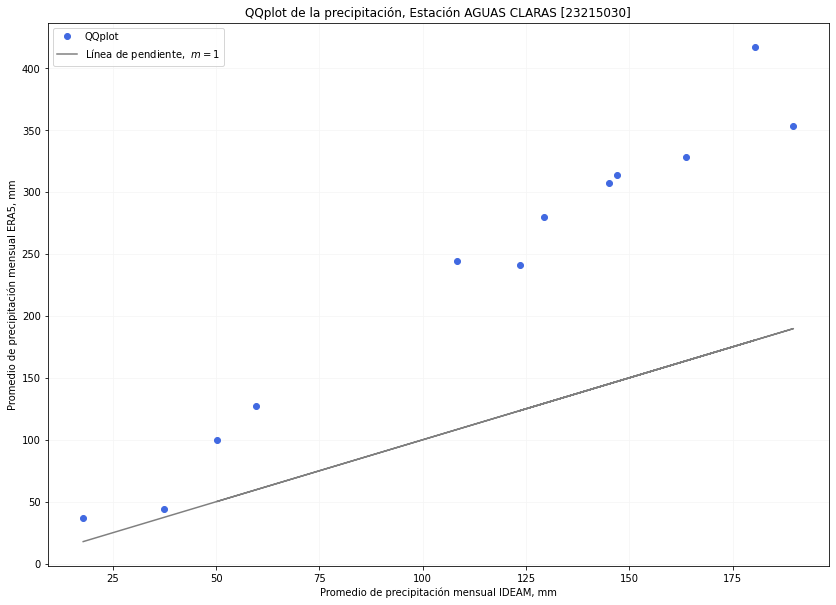

Precipitación
--------------------------------


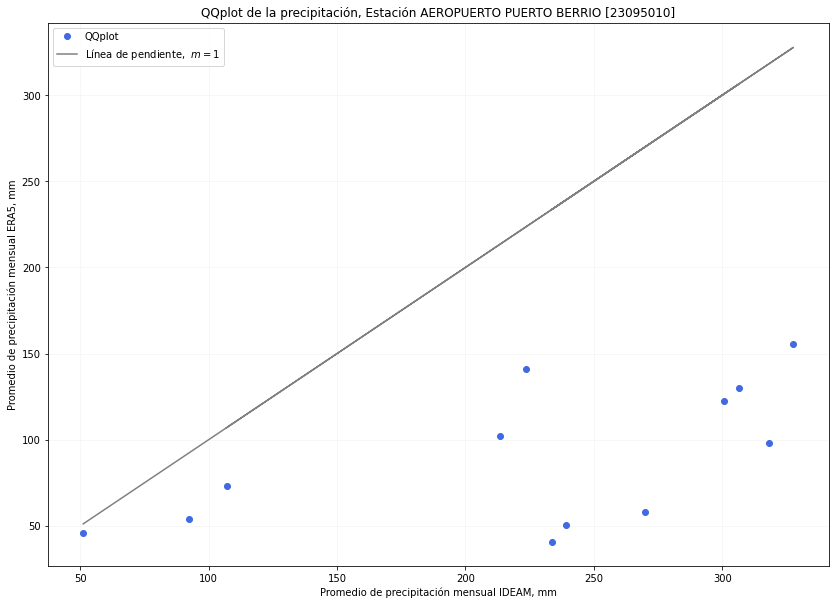

Precipitación
--------------------------------


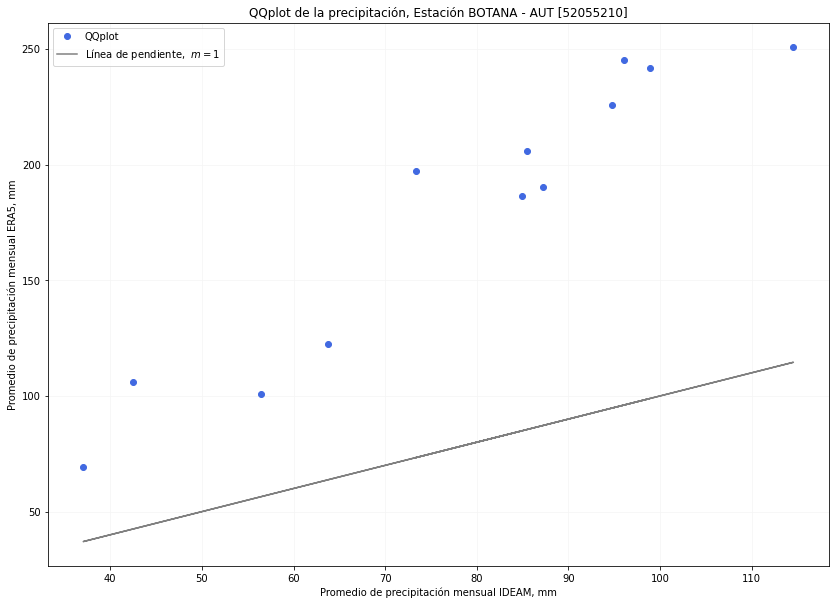

Precipitación
--------------------------------


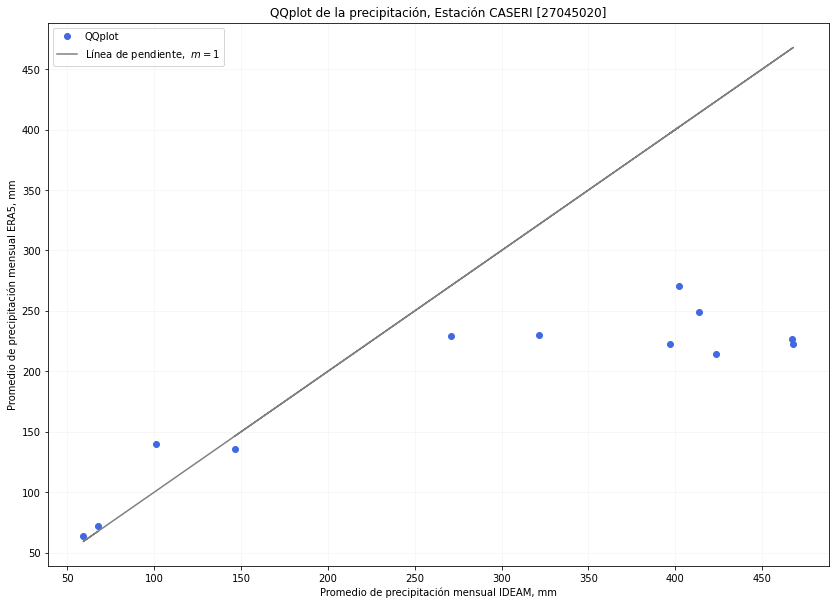

Precipitación
--------------------------------


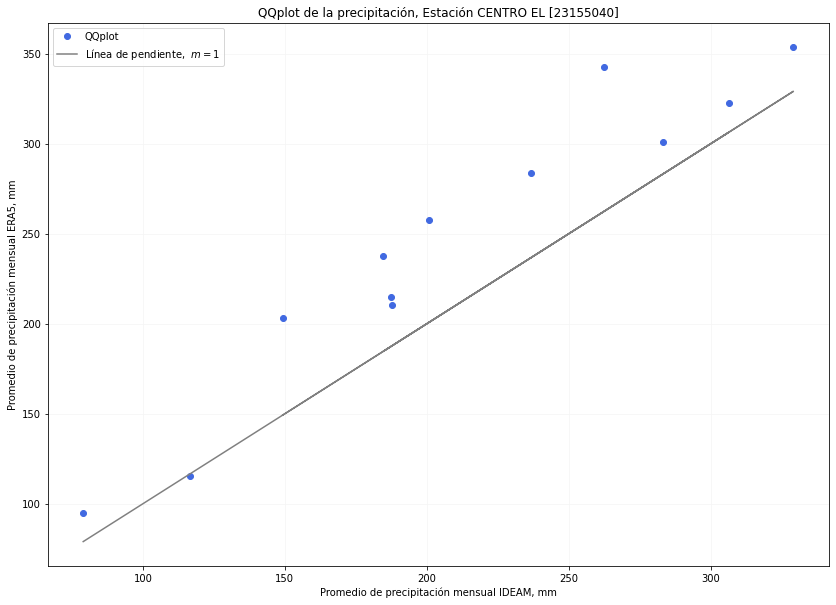

Precipitación
--------------------------------


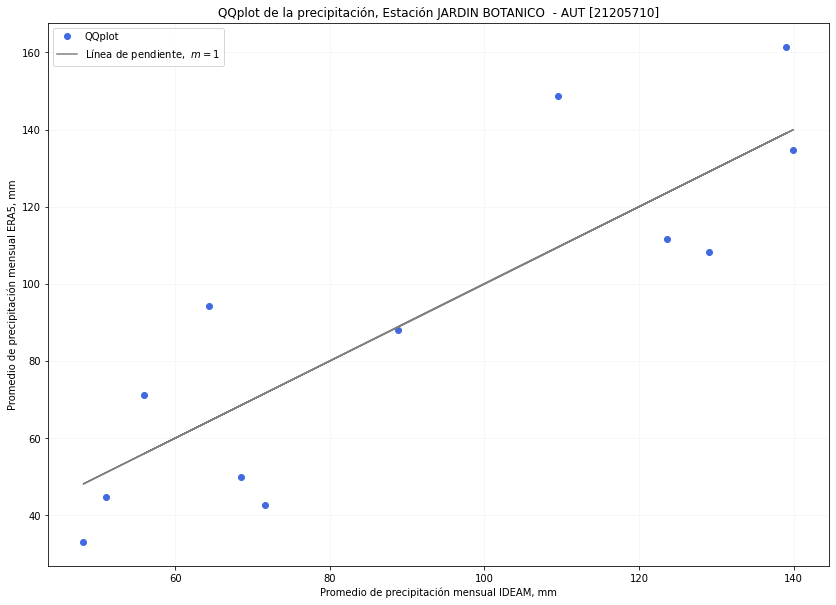

Precipitación
--------------------------------


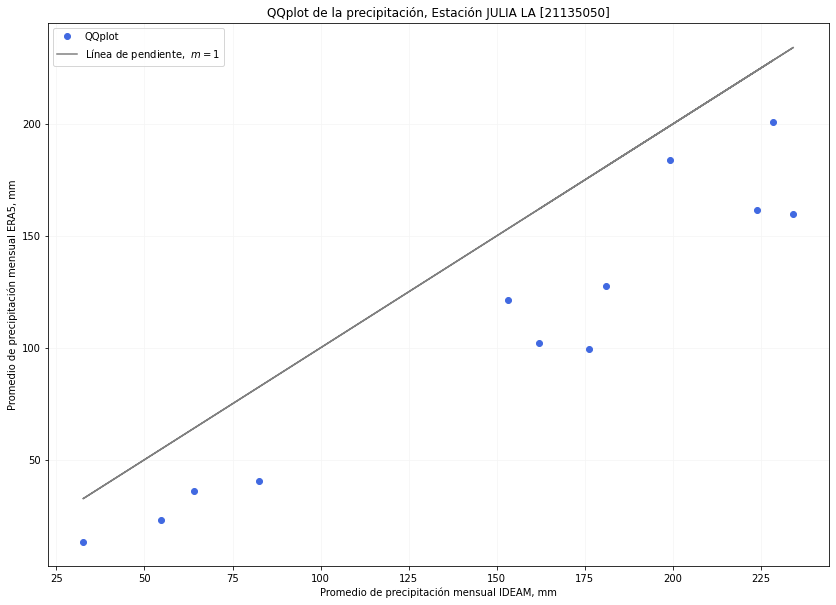

Precipitación
--------------------------------


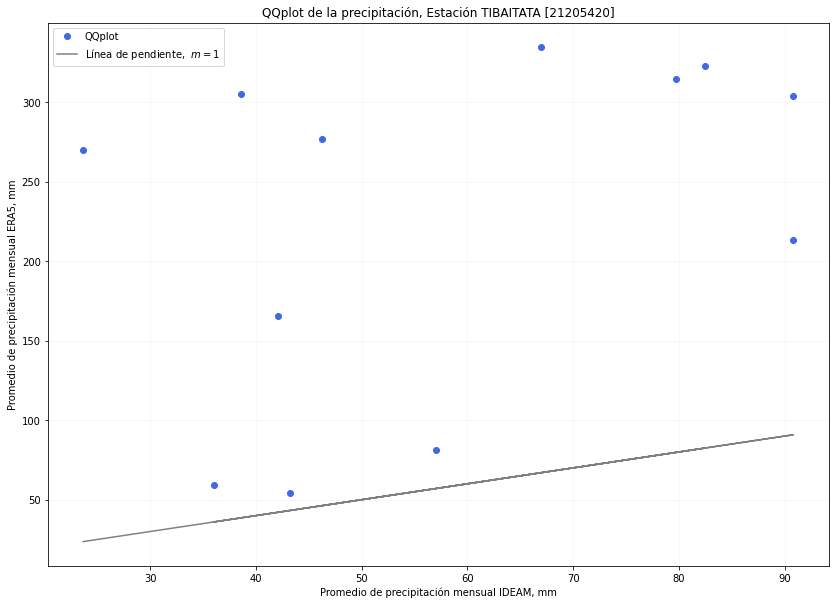

Precipitación
--------------------------------


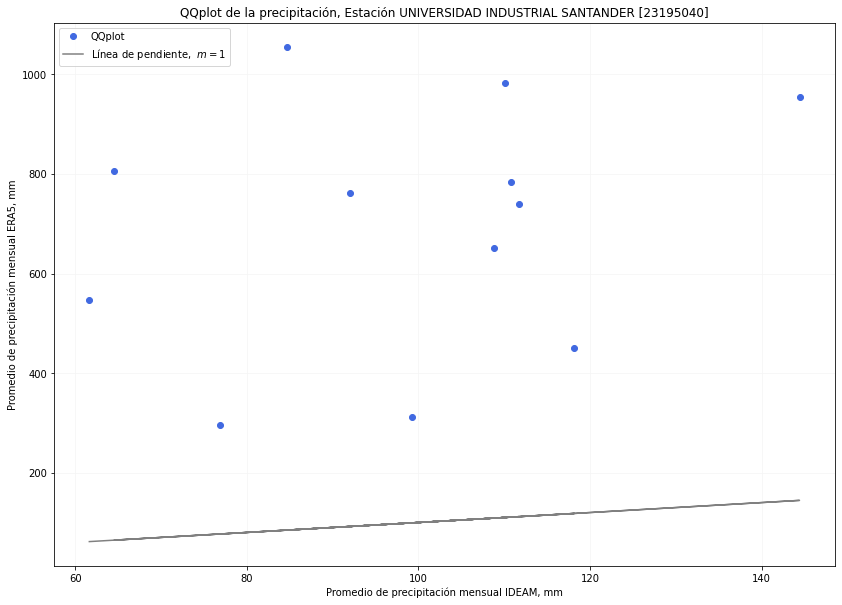

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ANDINA/
qqplot('AguasClaras_1990-2019.xlsx')
qqplot('APuertoBerrio_1990-2019.xlsx')
qqplot('Botana_1990-2019.xlsx')
qqplot('Caseri_1990-2019.xlsx')
qqplot('ElCentro_1990-2019.xlsx')
qqplot('JardinBotanico_1990-2019.xlsx')
qqplot('LaJulia_1990-2019.xlsx')
qqplot('Tibaitata_1990-2019.xlsx')
qqplot('UIS_1990-2019.xlsx')

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA
Precipitación
--------------------------------


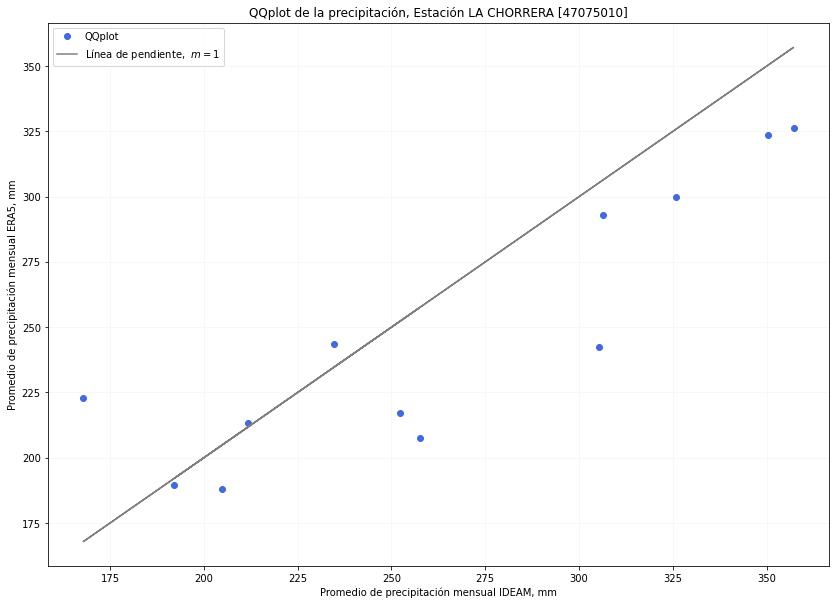

Precipitación
--------------------------------


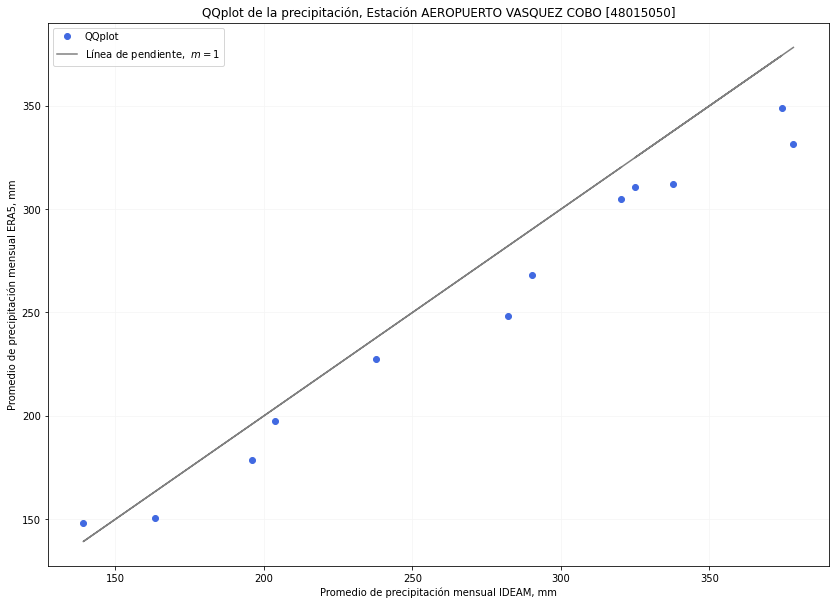

Precipitación
--------------------------------


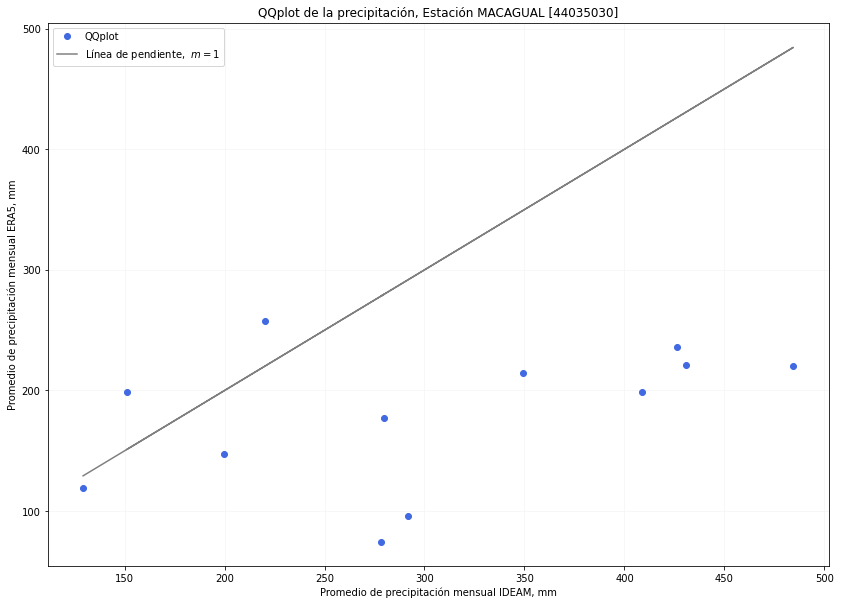

Precipitación
--------------------------------


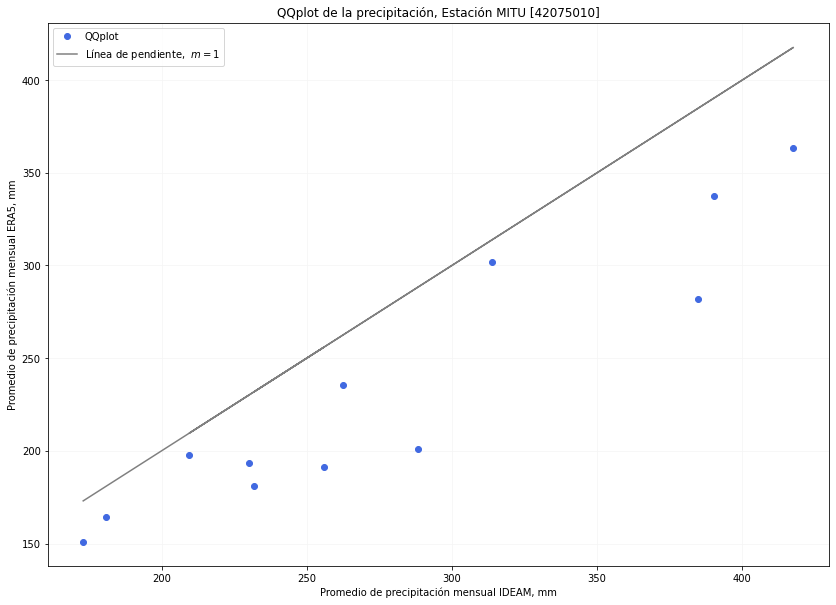

Precipitación
--------------------------------


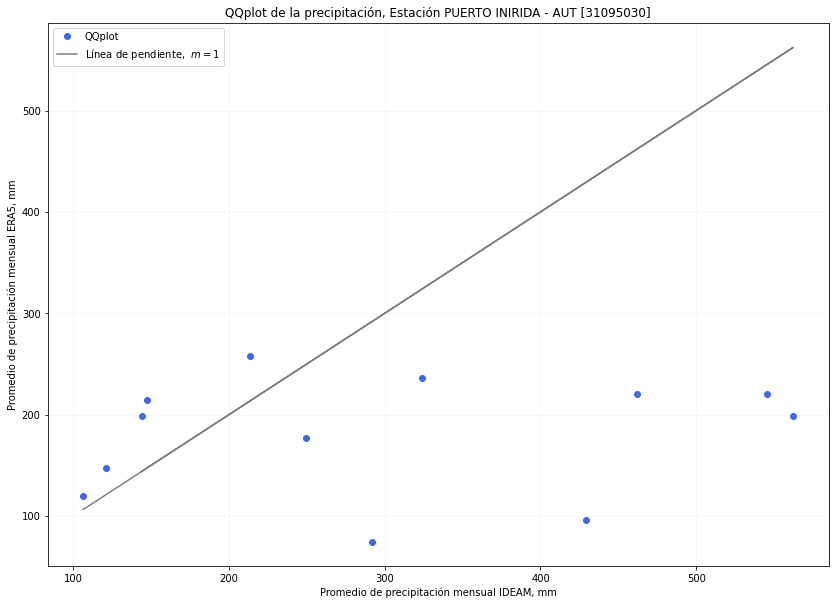

Precipitación
--------------------------------


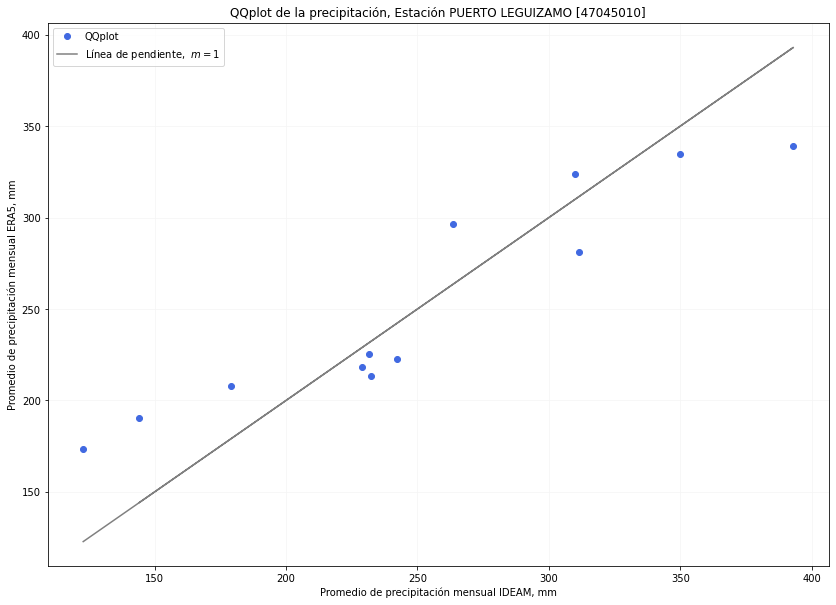

Precipitación
--------------------------------


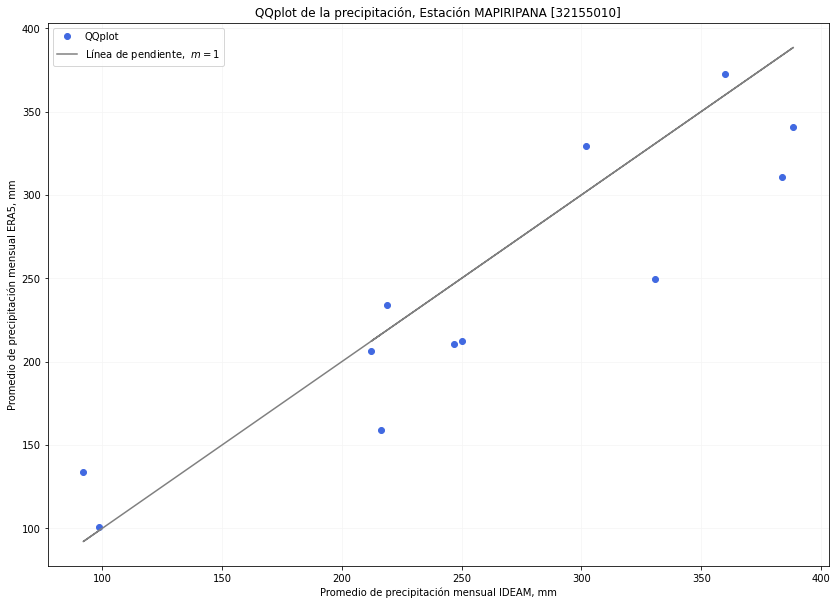

Precipitación
--------------------------------


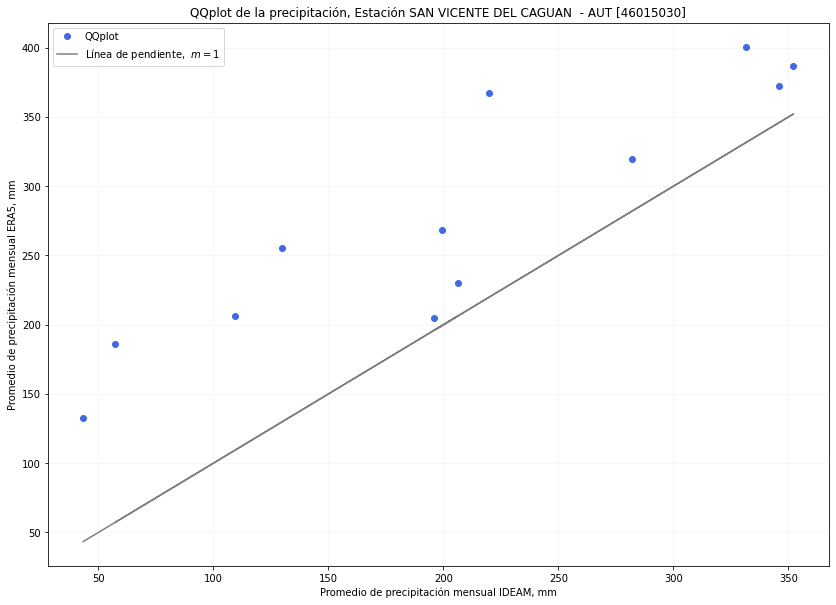

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/AMAZONIA/
qqplot('LaChorrera_1990-2019.xlsx')
qqplot('Leticia_1990-2019.xlsx')
qqplot('Macagual_1990-2019.xlsx')
qqplot('Mitu_1990-2019.xlsx')
qqplot('PuertoInirida_1990-2019.xlsx')
qqplot('PuertoLeguizamo_1990-2019.xlsx')
qqplot('SanJoseDelGuaviare_1990-2019.xlsx')
qqplot('SanVicenteDelCaguan_1990-2019.xlsx')

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE
Precipitación
--------------------------------


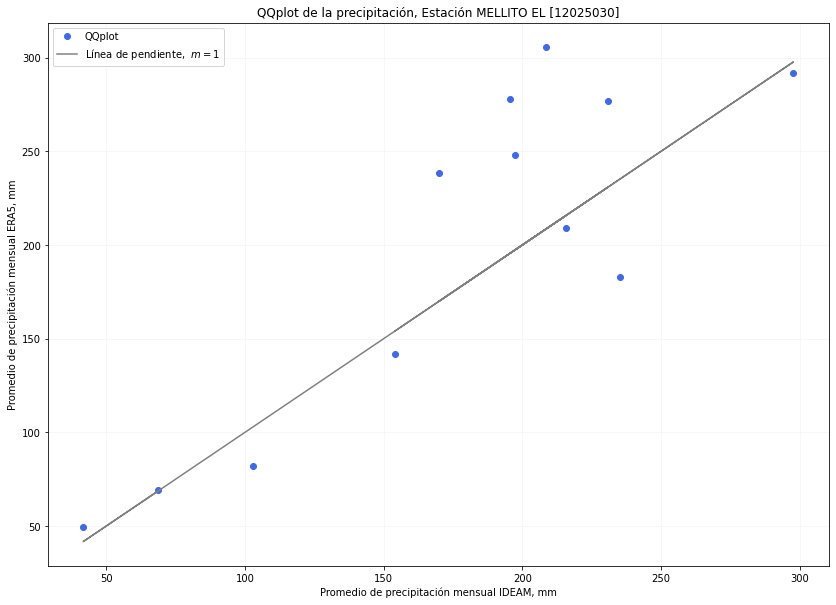

Precipitación
--------------------------------


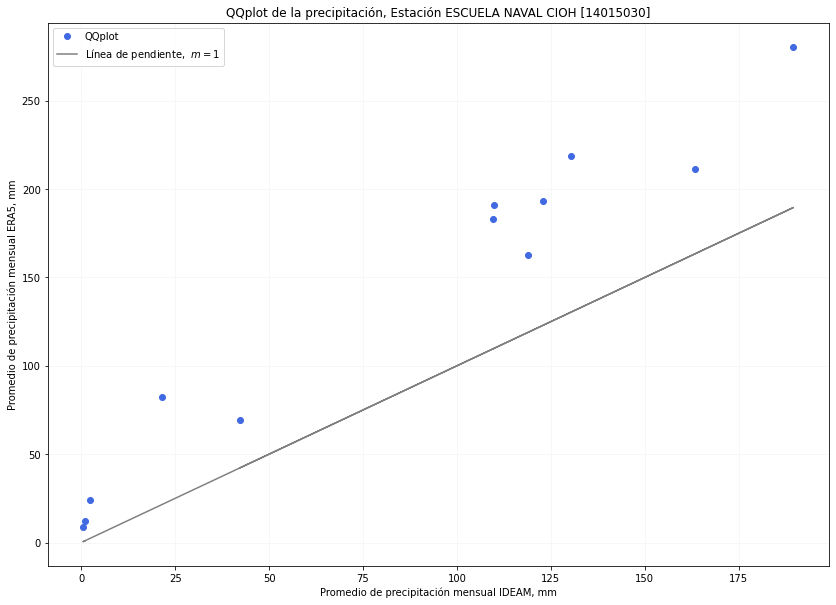

Precipitación
--------------------------------


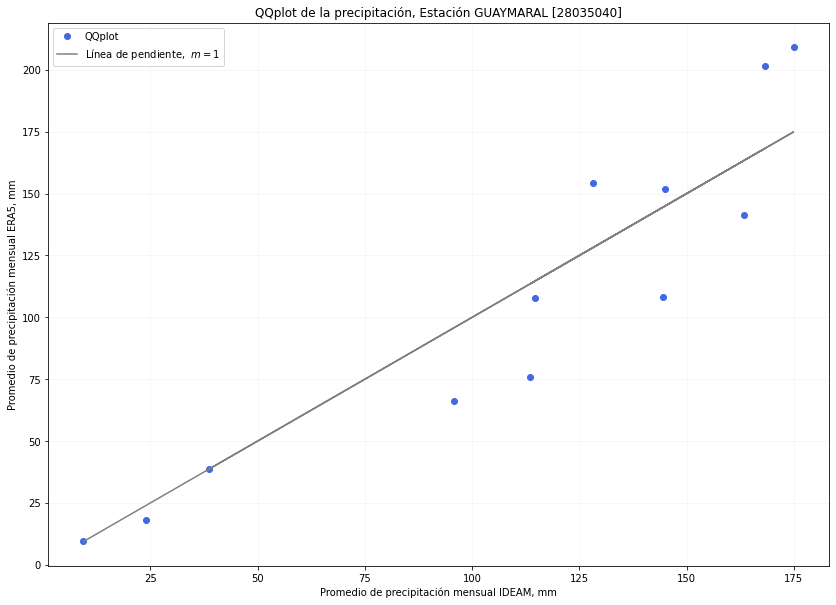

Precipitación
--------------------------------


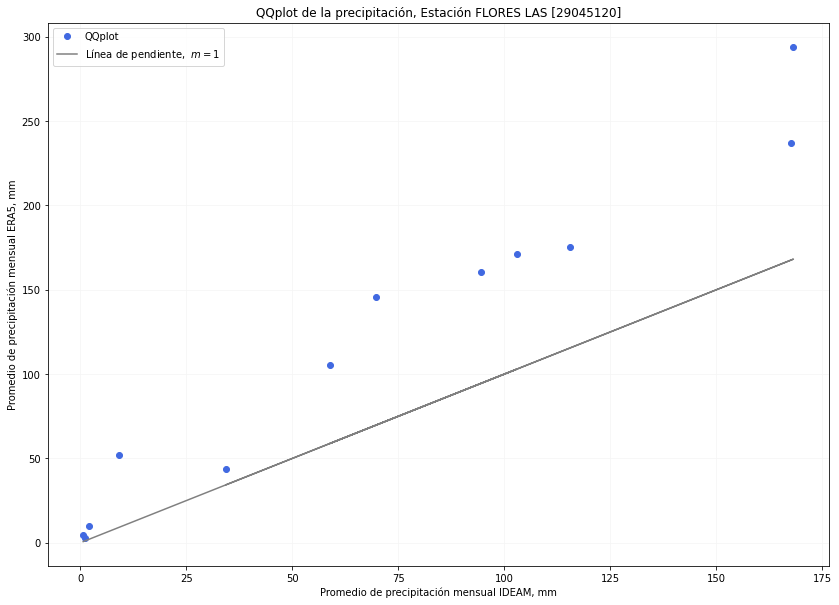

Precipitación
--------------------------------


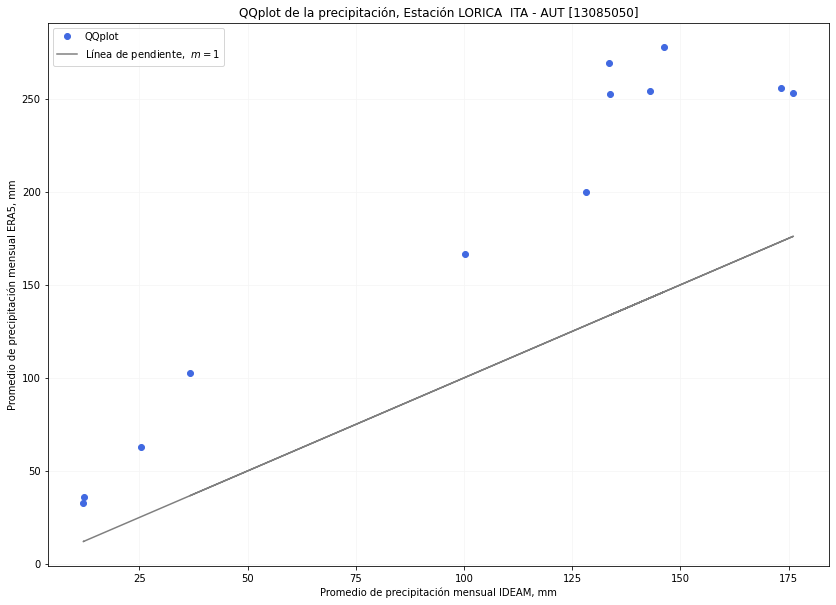

Precipitación
--------------------------------


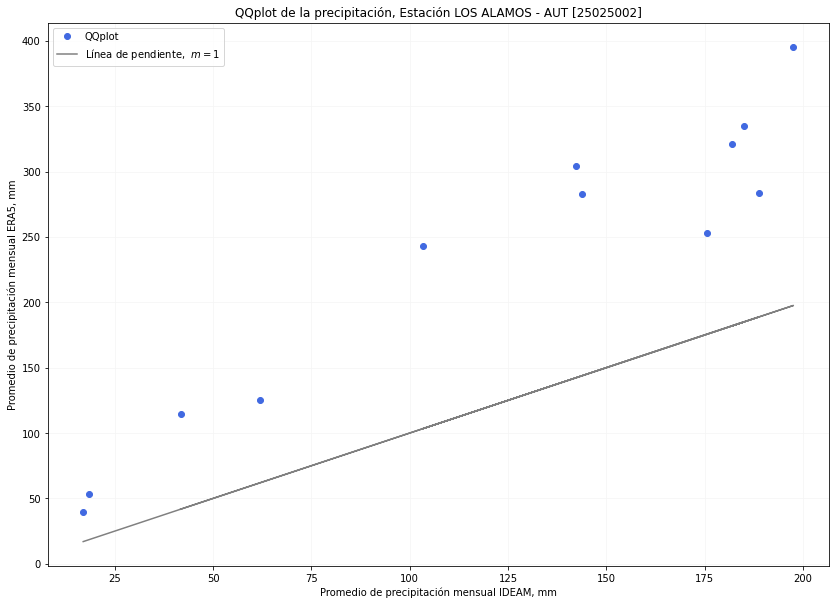

Precipitación
--------------------------------


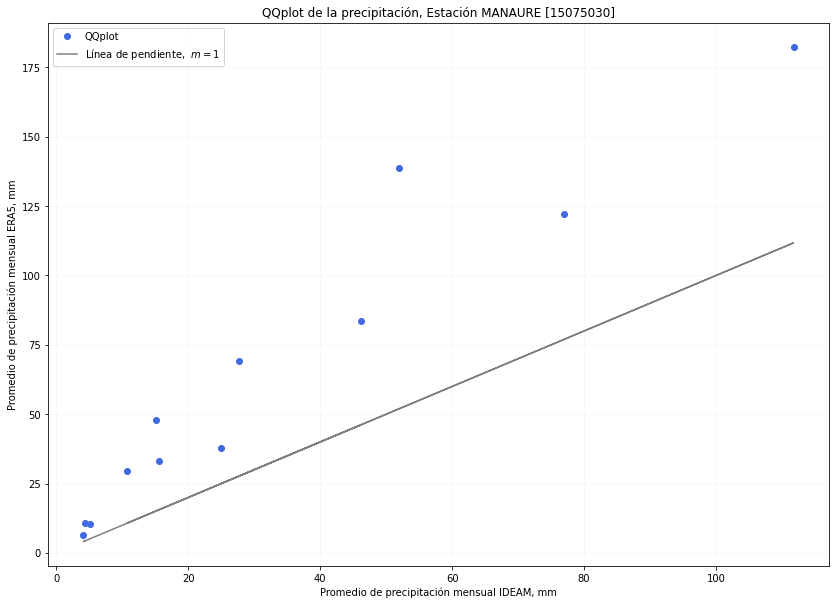

Precipitación
--------------------------------


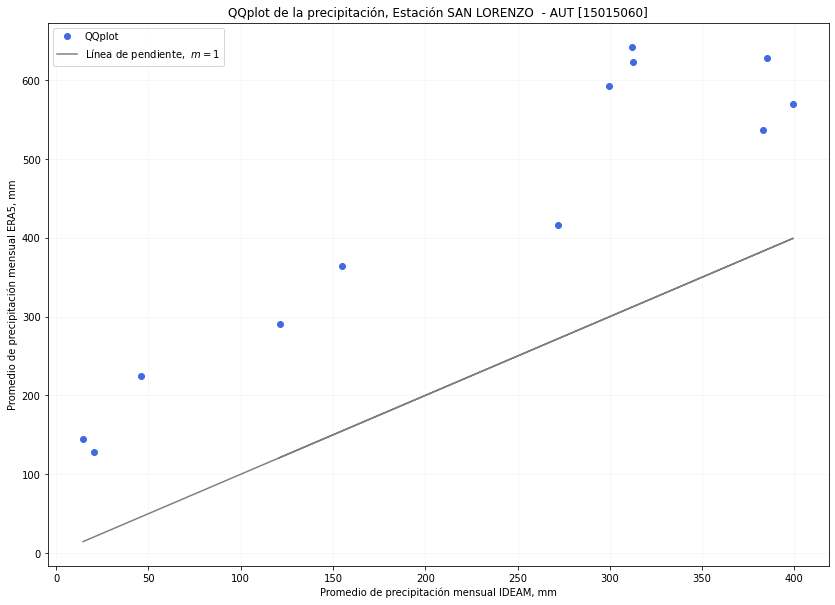

Precipitación
--------------------------------


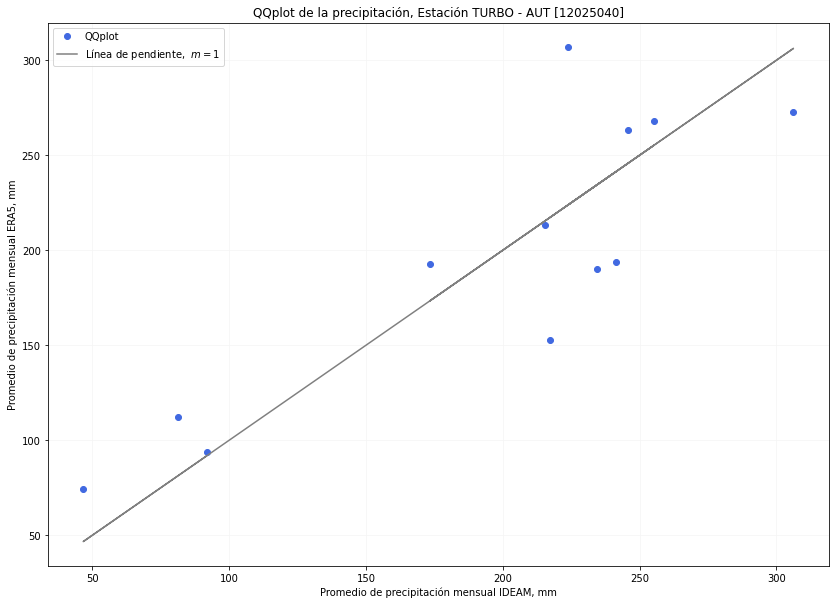

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/CARIBE/
qqplot('ElMellito_1990-2019.xlsx')
qqplot('EscuelaNavalCIOH_1990-2019.xlsx')
qqplot('Guaymaral_1990-2019.xlsx')
qqplot('LasFlores_1990-2019.xlsx')
qqplot('Lorica_1990-2019.xlsx')
qqplot('LosAlamos_1990-2019.xlsx')
qqplot('Manaure_1990-2019.xlsx')
qqplot('SanLorenzo_1990-2019.xlsx')
qqplot('Turbo_1990-2019.xlsx')

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR
Precipitación
--------------------------------


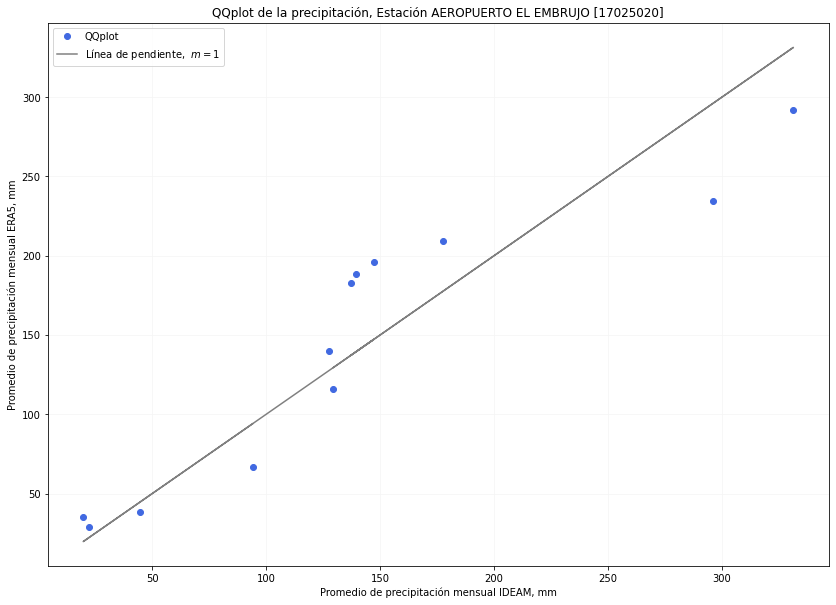

Precipitación
--------------------------------


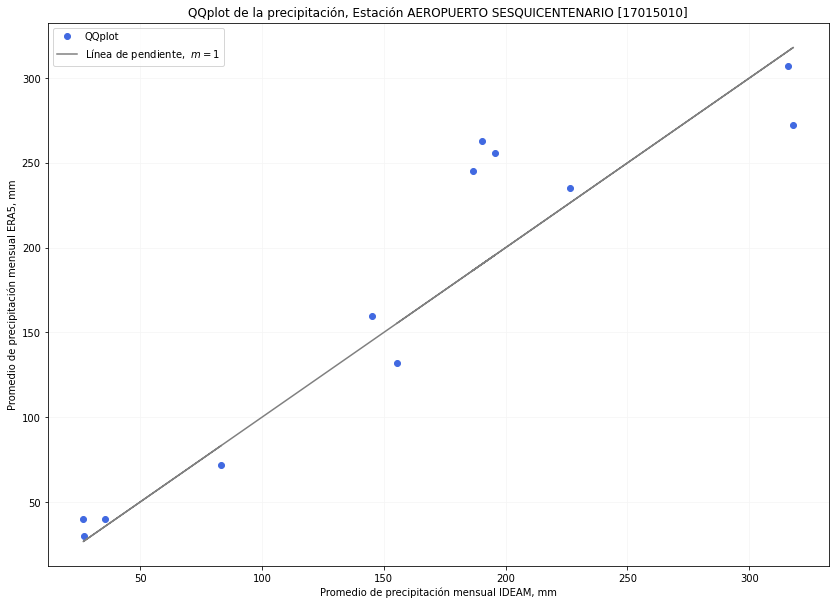

Precipitación
--------------------------------


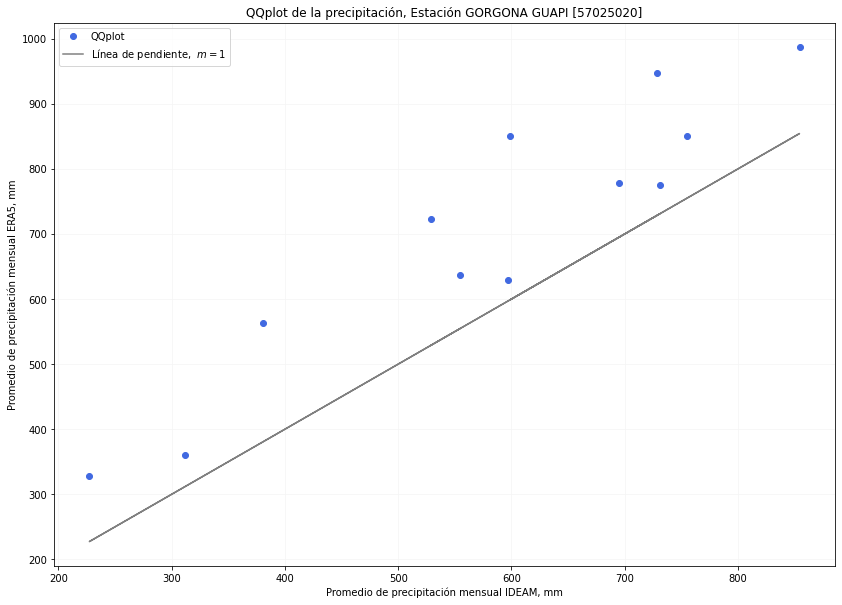

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/INSULAR/
qqplot('AElEmbrujo_1990-2019.xlsx')
qqplot('ASesquicentenario_1990-2019.xlsx')
qqplot('Gorgona_1990-2019.xlsx')

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA
Precipitación
--------------------------------


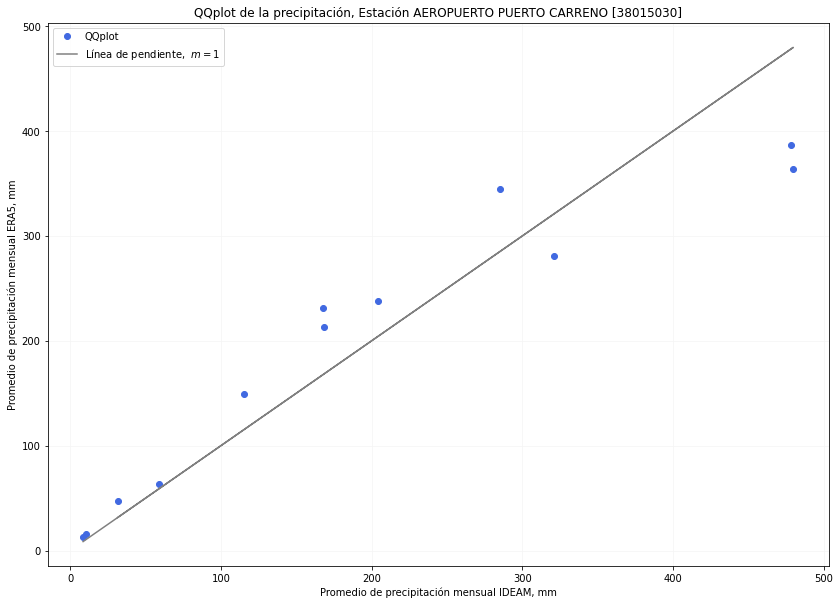

Precipitación
--------------------------------


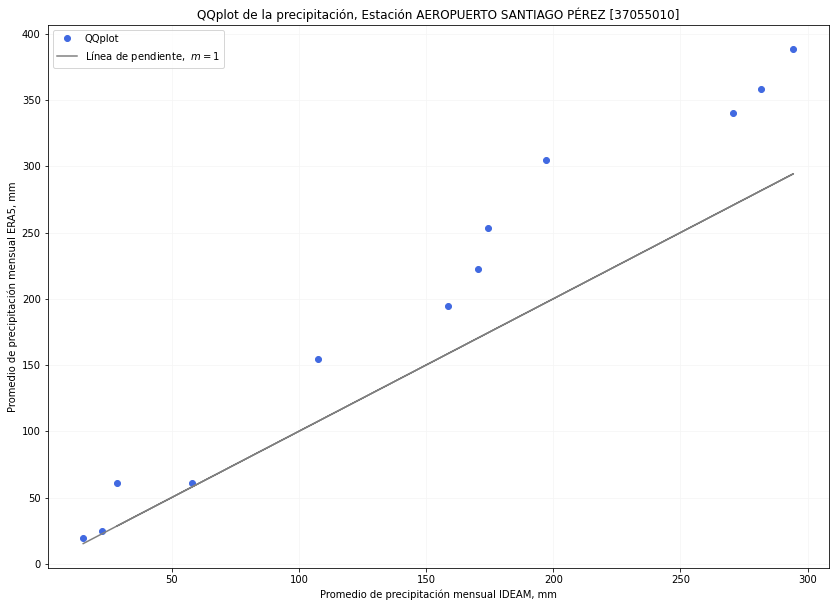

Precipitación
--------------------------------


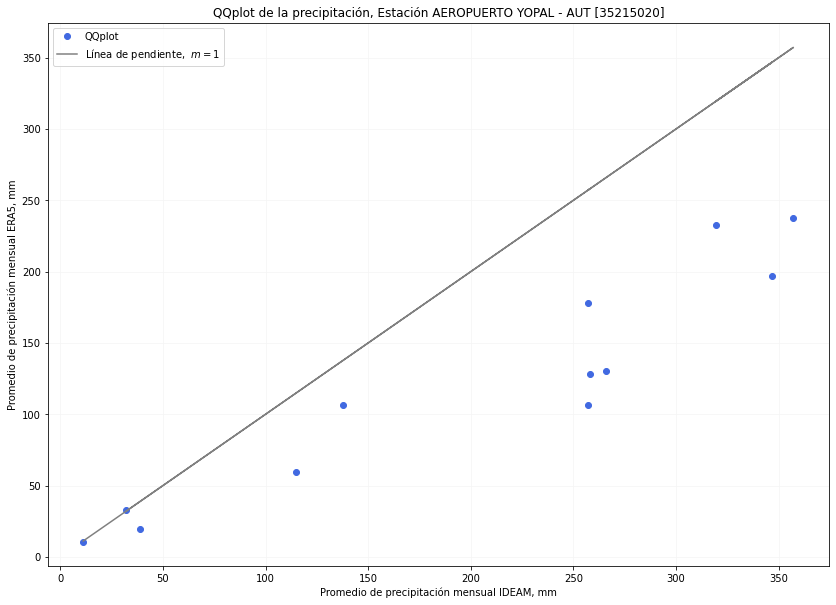

Precipitación
--------------------------------


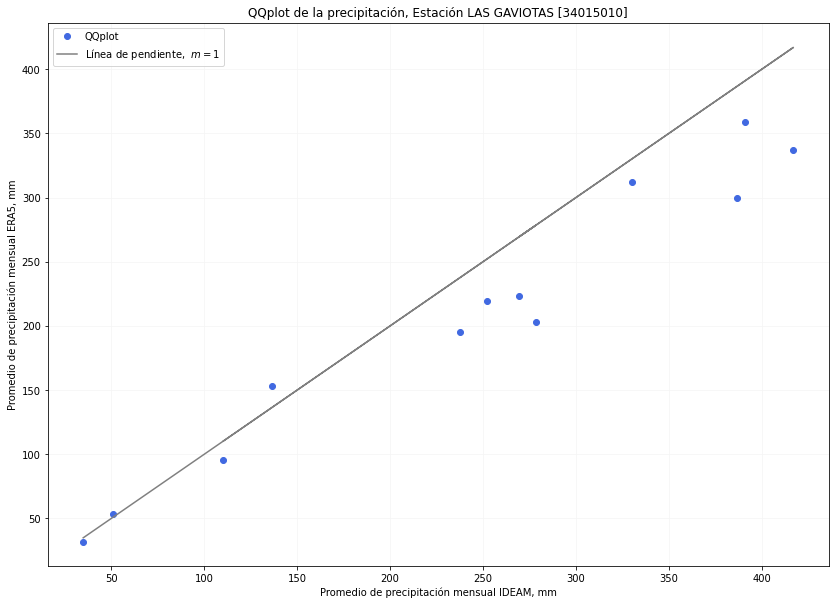

Precipitación
--------------------------------


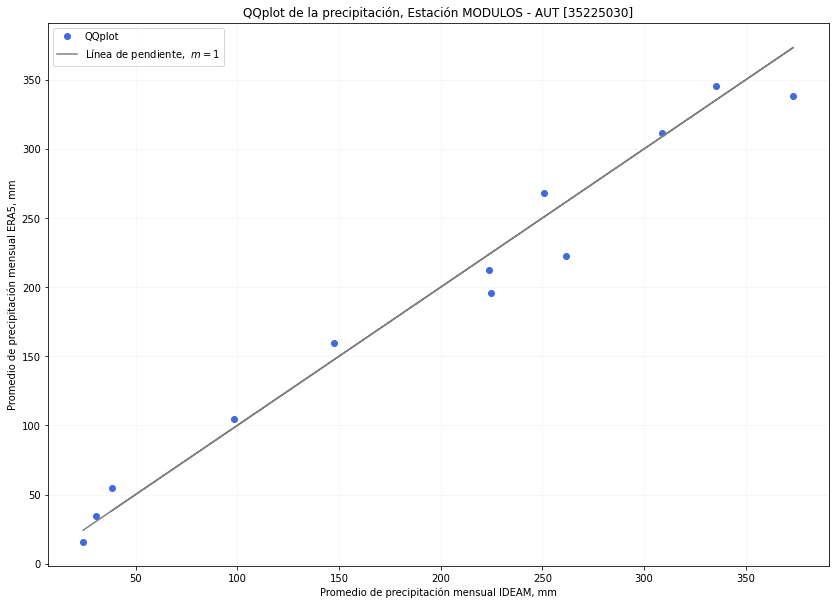

Precipitación
--------------------------------


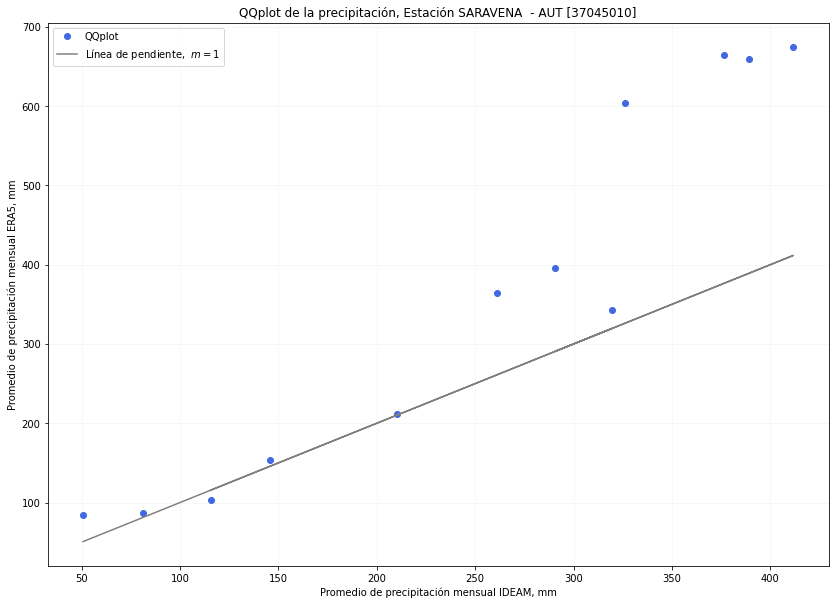

Precipitación
--------------------------------


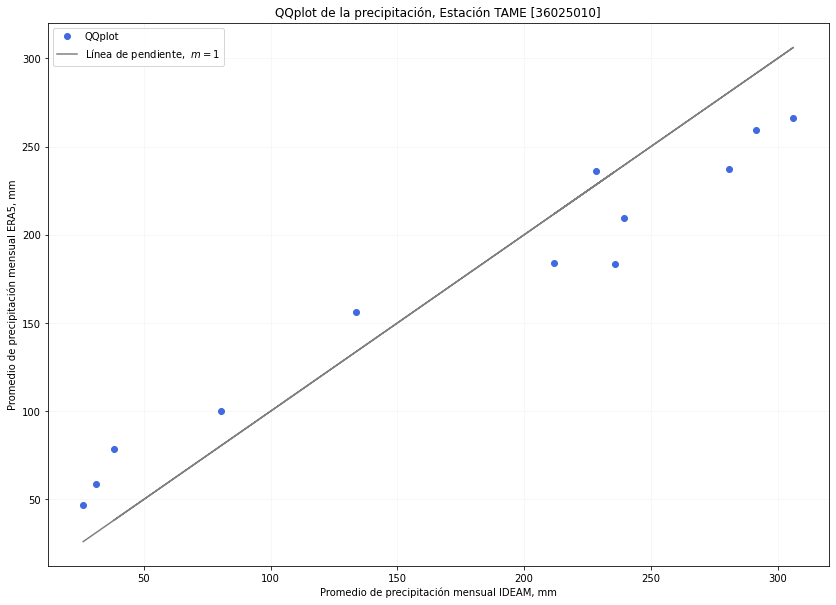

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/ORINOQUIA/
qqplot('APuertoCarreno_1990-2019.xlsx')
qqplot('ASantiagoPerez_1990-2019.xlsx')
qqplot('AYopal_1990-2019.xlsx')
qqplot('LasGaviotas_1990-2019.xlsx')
qqplot('Modulos_1990-2019.xlsx')
qqplot('Saravena_1990-2019.xlsx')
qqplot('Tame_1990-2019.xlsx')

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA
Precipitación
--------------------------------


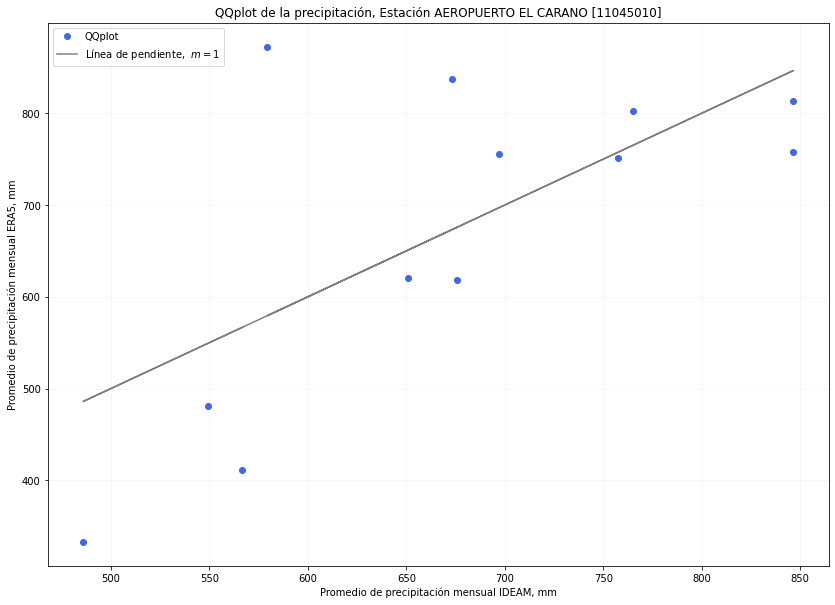

Precipitación
--------------------------------


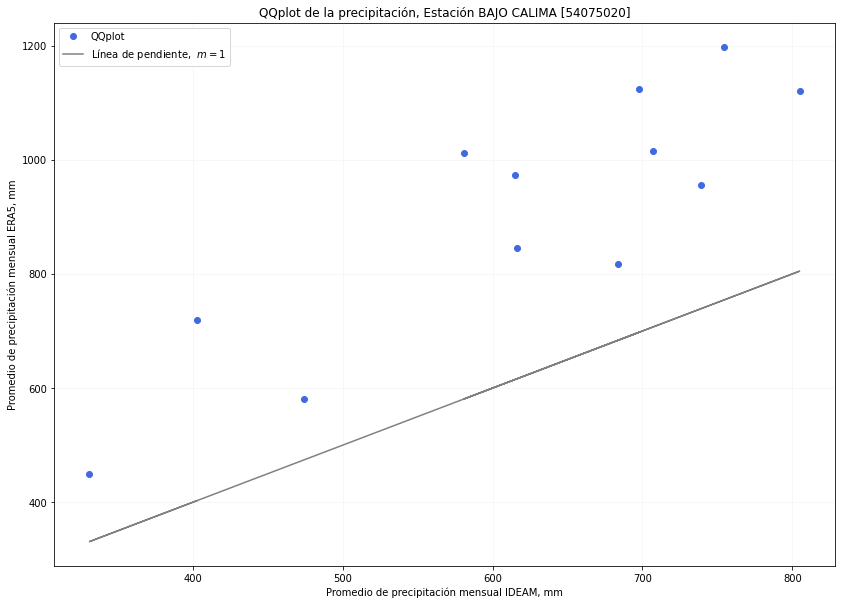

Precipitación
--------------------------------


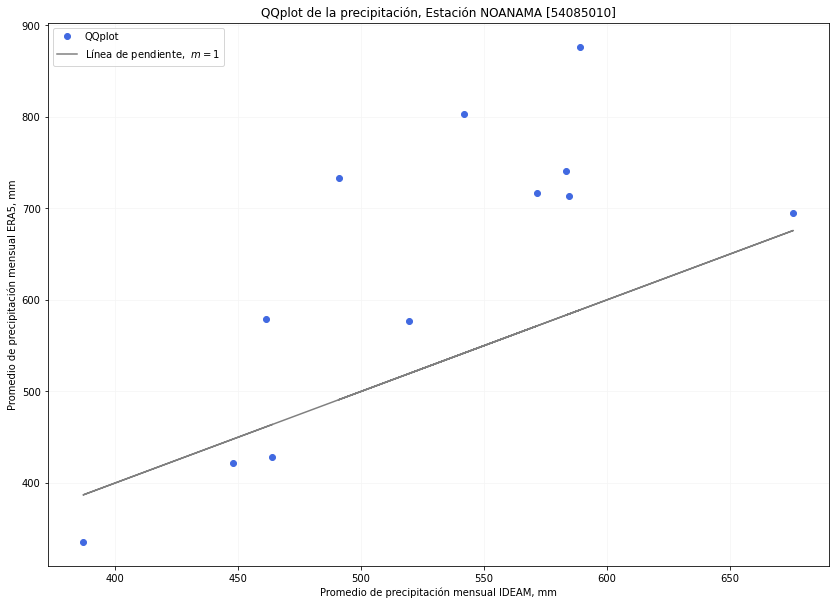

Precipitación
--------------------------------


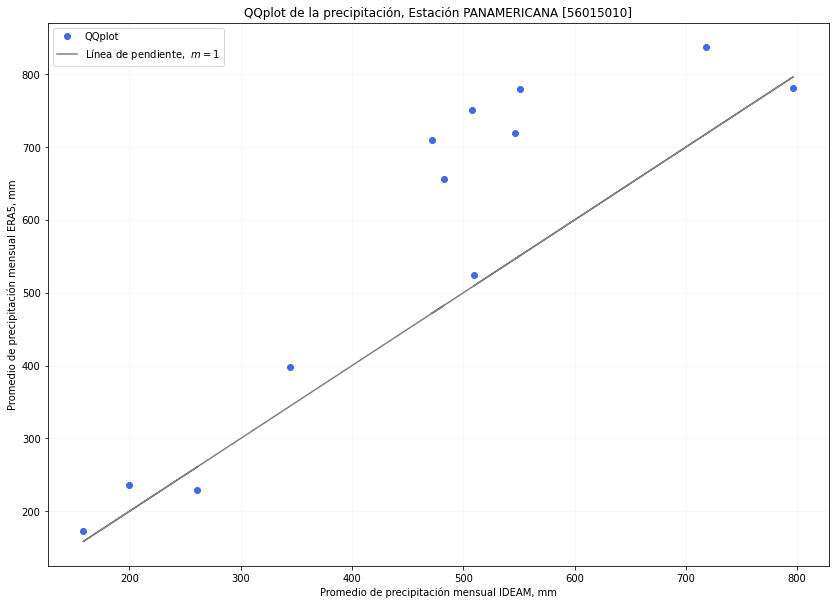

Precipitación
--------------------------------


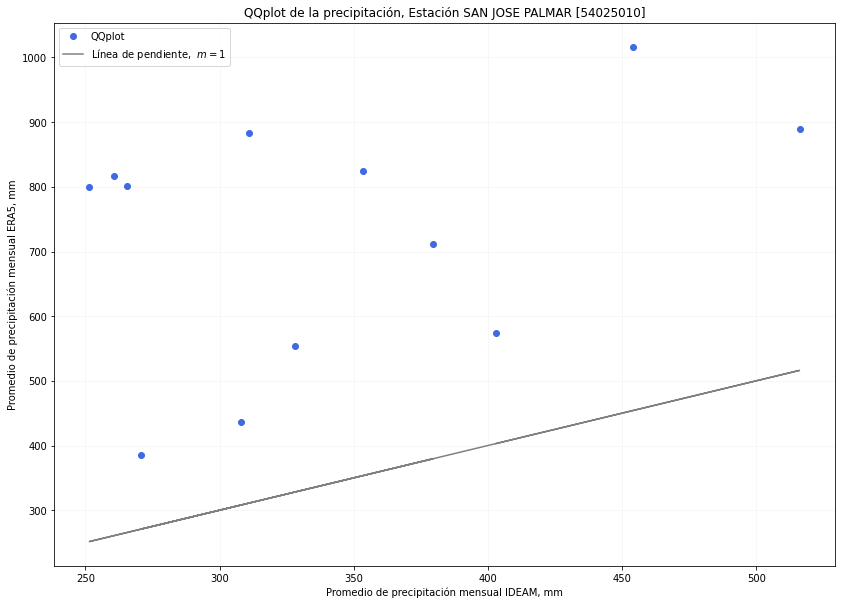

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/PACIFICA/
qqplot('AElCarnaro_1990-2019.xlsx')
qqplot('BajoCalima_1990-2019.xlsx')
qqplot('Noanama_1990-2019.xlsx')
qqplot('Panamericana_1990-2019.xlsx')
qqplot('SanJosePalmar_1990-2019.xlsx')

#**MAPAS**

In [ ]:
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7/

/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega7


In [ ]:
dp = pd.read_excel('Libro_estaciones.xlsx',sheet_name='P')
dtmin = pd.read_excel('Libro_estaciones.xlsx',sheet_name='TMin')
dtmax = pd.read_excel('Libro_estaciones.xlsx',sheet_name='TMax')

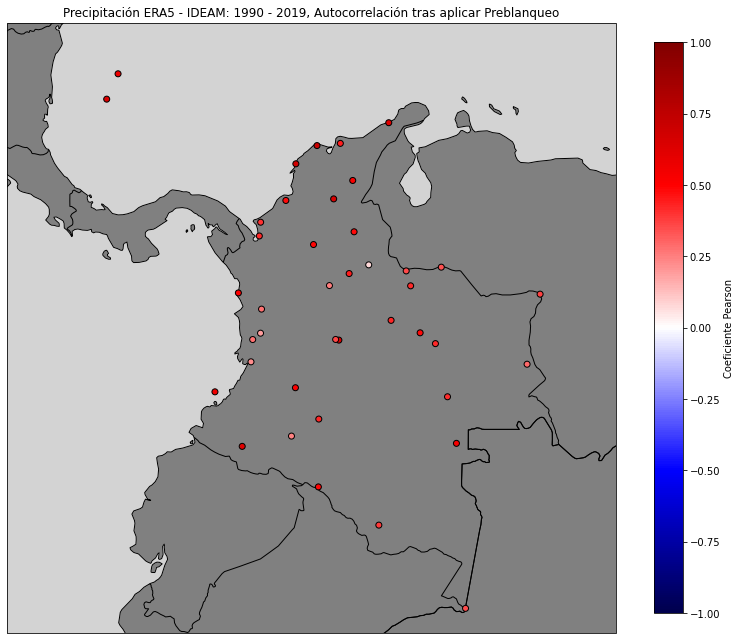

In [ ]:
# descargar topografía y fronteras
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(30,30))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND,color='gray')
ax.add_feature(cfeature.OCEAN,color='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Precipitación ERA5 - IDEAM: 1990 - 2019, Autocorrelación tras aplicar Preblanqueo')
im1 = ax.scatter(dp['lon'],dp['lat'],c=dp['prewhiten'],vmin = -1, vmax = 1,transform=ccrs.Geodetic(),cmap='seismic',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='Coeficiente Pearson',shrink=0.35)
plt.savefig('PrewhitenP.pdf',dpi=1000)
plt.show()

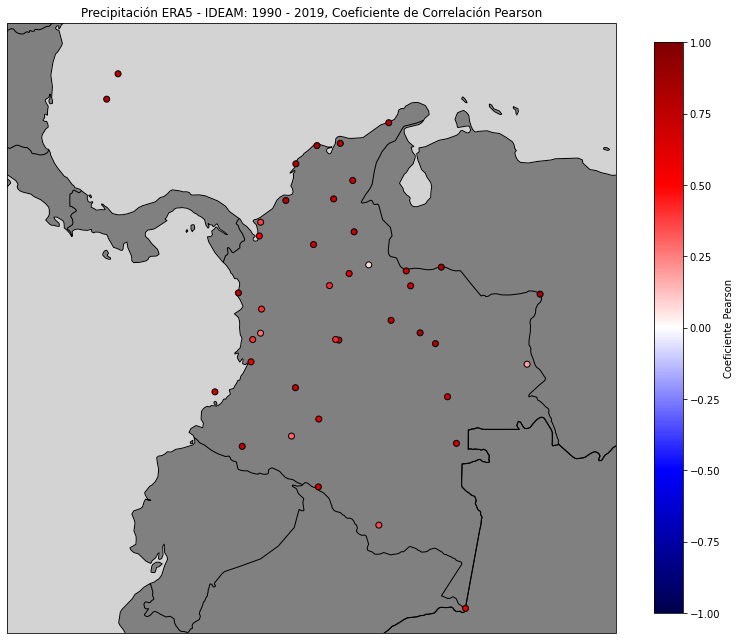

In [ ]:
# descargar topografía y fronteras
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(30,30))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND,color='gray')
ax.add_feature(cfeature.OCEAN,color='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Precipitación ERA5 - IDEAM: 1990 - 2019, Coeficiente de Correlación Pearson')
im1 = ax.scatter(dp['lon'],dp['lat'],c=dp['corr'],vmin = -1, vmax = 1,transform=ccrs.Geodetic(),cmap='seismic',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='Coeficiente Pearson',shrink=0.35)
plt.savefig('CorrP.pdf',dpi=1000)
plt.show()

In [ ]:
# descargar topografía y fronteras
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(30,30))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND,color='gray')
ax.add_feature(cfeature.OCEAN,color='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Temperatura Mínima ERA5 - IDEAM: 1990 - 2019, Autocorrelación tras aplicar Preblanqueo')
im1 = ax.scatter(dtmin['lon'],dtmin['lat'],c=dtmin['prewhiten'],vmin = -1, vmax = 1,transform=ccrs.Geodetic(),cmap='seismic',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='Coeficiente Pearson',shrink=0.35)
plt.savefig('PrewhitenTMin.pdf',dpi=1000)
plt.show()

In [ ]:
# descargar topografía y fronteras
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(30,30))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND,color='gray')
ax.add_feature(cfeature.OCEAN,color='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Temperatura Mínima ERA5 - IDEAM: 1990 - 2019, Coeficiente de Correlación Pearson')
im1 = ax.scatter(dtmin['lon'],dtmin['lat'],c=dtmin['corr'],vmin = -1, vmax = 1,transform=ccrs.Geodetic(),cmap='seismic',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='Coeficiente Pearson',shrink=0.35)
plt.savefig('CorrTMin.pdf',dpi=1000)
plt.show()

In [ ]:
# descargar topografía y fronteras
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(30,30))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND,color='gray')
ax.add_feature(cfeature.OCEAN,color='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Temperatura Máxima ERA5 - IDEAM: 1990 - 2019, Autocorrelación tras aplicar Preblanqueo')
im1 = ax.scatter(dtmax['lon'],dtmax['lat'],c=dtmax['prewhiten'],vmin = -1, vmax = 1,transform=ccrs.Geodetic(),cmap='seismic',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='Coeficiente Pearson',shrink=0.35)
plt.savefig('PrewhitenTMax.pdf',dpi=1000)
plt.show()

In [ ]:
# descargar topografía y fronteras
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(30,30))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND,color='gray')
ax.add_feature(cfeature.OCEAN,color='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('Temperatura Máxima ERA5 - IDEAM: 1990 - 2019, Coeficiente de Correlación Pearson')
im1 = ax.scatter(dtmax['lon'],dtmax['lat'],c=dtmax['corr'],vmin = -1, vmax = 1,transform=ccrs.Geodetic(),cmap='seismic',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='Coeficiente Pearson',shrink=0.35)
plt.savefig('CorrTMax.pdf',dpi=1000)
plt.show()

In [ ]:
!dir

AMAZONIA	 HistMIN.pdf		      PrewhitenP.pdf
ANDINA		 HistP.pdf		      PrewhitenP.png
Boxplot.pdf	 INSULAR		      PrewhitenTMax.pdf
CARIBE		 Libro_estacionesNONORM.xlsx  PrewhitenTMax.png
CorrP.pdf	 Libro_estaciones.xlsx	      PrewhitenTMin.pdf
CorrTMax.pdf	 NormalizedP.pdf	      PrewhitenTMin.png
CorrTMin.pdf	 NormalizedTMAX.pdf	      UNIRPDFS2.pdf
Entrega10.ipynb  NormalizedTMIN.pdf	      UNIRPDFS3.pdf
Entrega7.ipynb	 ORINOQUIA		      UNIRPDFS4.pdf
Entrega9.ipynb	 PACIFICA		      UNIRPDFS.pdf
HistMAX.pdf	 PDFTMIN.pdf


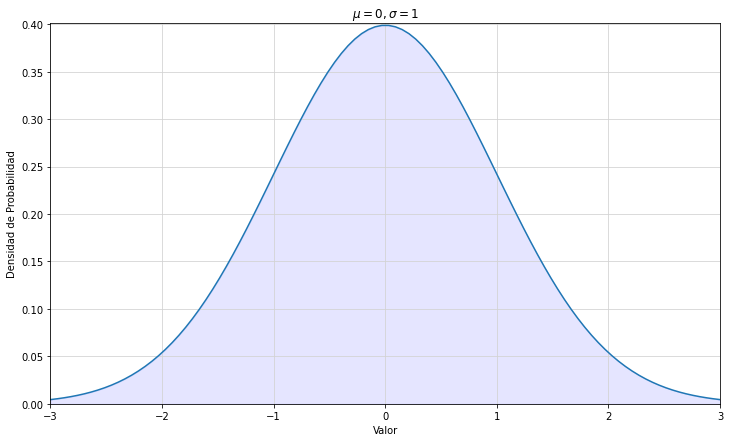

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,7))
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax.plot(x, stats.norm.pdf(x, mu, sigma))
ax.grid(axis='both',color='lightgray')
ax.fill_between(x, stats.norm.pdf(x, mu, sigma), 0, color='blue', alpha=.1)
ax.set_xlim(-3,3)
ax.set_ylim(0,0.401)
ax.set_ylabel('Densidad de Probabilidad')
ax.set_xlabel('Valor')
ax.set_title('$μ = 0, σ = 1$')
plt.savefig('CampanadeGauss.pdf',dpi=1500)
plt.show()

# **GRÁFICAS PARA LA TESIS**

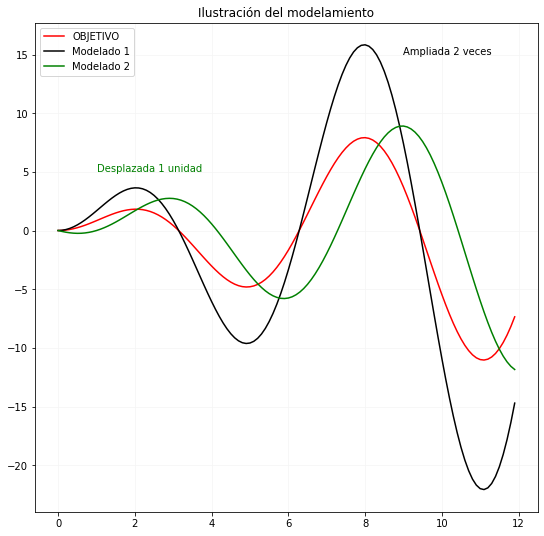

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,12,0.1)
y1 = x*np.sin(x)
y2 = 2*(x*np.sin(x))
y3 = (x*np.sin(x-1))
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(9,9))
#ax.set_xlim(0,len(x))
ax.plot(x,y1,label='OBJETIVO',color='red',linestyle='solid')
ax.plot(x,y2,label='Modelado 1',color='black',linestyle='solid')
ax.plot(x,y3,label='Modelado 2',color='green',linestyle='solid')
ax.grid(axis='both',color='whitesmoke')
ax.set_title('Ilustración del modelamiento')
ax.text(9,15,'Ampliada 2 veces',color='black')
ax.text(1,5,'Desplazada 1 unidad',color='green')
ax.legend(loc=2)
plt.savefig('111MODELAMIENTO.png',dpi=500)

In [ ]:
from scipy.spatial.distance import euclidean
c2 = np.corrcoef(y1,y2)
c3 = np.corrcoef(y1,y3)
d2 = euclidean(y1,y2)
d3 = euclidean(y1,y3)
print('Correlación y1,y2',c2)
print('Correlación y1,y3',c3)
print('')
print('Distancia y1,y2',d2)
print('Distancia y1,y3',d3)

Correlación y1,y2 [[1. 1.]
 [1. 1.]]
Correlación y1,y3 [[1.         0.62189575]
 [0.62189575 1.        ]]

Distancia y1,y2 56.30622875779602
Distancia y1,y3 48.3590563159542
